In [1]:
# Notebook to separate and analyze cells based on tuning 

In [2]:
print(sys.path)

['C:\\Users\\Connor\\Repositories\\analysisConnor2025\\develop', 'C:\\Users\\Connor\\anaconda3\\python312.zip', 'C:\\Users\\Connor\\anaconda3\\DLLs', 'C:\\Users\\Connor\\anaconda3\\Lib', 'C:\\Users\\Connor\\anaconda3', '', 'C:\\Users\\Connor\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Connor\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Connor\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Connor\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Connor\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']


In [1]:
# import and load modules
%reload_ext autoreload
%autoreload 2
import pprint
import operator
import numpy as np; import pandas as pd; import math as math; import copy; import statistics
from scipy.ndimage import gaussian_filter as gaussian_filter; import scipy.stats as stats
import statsmodels.api as sm; lowess = sm.nonparametric.lowess; from skimage import transform
from scipy.optimize import curve_fit

#from loess.loess_1d import loess_1d;
import seaborn as sns
from seaborn import violinplot
from seaborn import load_dataset


#mworks importsc
#from mworksbehavior import mwkfiles; from mworksbehavior.imaging import intrinsic as ii; import mworksbehavior as mwb; import mworksbehavior.mwk_io

import matplotlib as mpl; import matplotlib.pyplot as plt; import matplotlib.gridspec as gridspec; from matplotlib import cm; from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable #from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle; from matplotlib.patches import Rectangle

import os, sys; from glob import glob; from pathlib import Path; import pickle
import tifffile as tfl; from datetime import datetime

sys.path.append(Path('src').resolve().as_posix()); 
import quietcell_select_fxns_all as qcsf
import compareQuiet as cQ

#local files and shorthand notations for assigning common functions to variable names
r_ = np.r_; a_ = np.asarray

In [23]:
# Paths
file_path_root = '\\learning-rules-data\\'
#'D:\learning-rules-data\i5214\npys-pre'

dir_i5273 = os.path.join(file_path_root,'i5273')
dir_pre_i5273 = os.path.join(dir_i5273,'npys-pre')
dir_post_i5273 = os.path.join(dir_i5273,'npys-post')

dir_i5273 = file_path_root + 'i5273' + '\\npys-pre'

dir_i5214 = os.path.join(file_path_root,'i5214')
dir_pre_i5214 = os.path.join(dir_i5214,'npys-pre\\')
dir_post_i5214 = os.path.join(dir_i5214,'npys-post\\')

dir_i5309 = os.path.join(file_path_root,'i5309')
dir_pre_i5309 = os.path.join(dir_i5309,'npys-pre\\')
dir_post_i5309 = os.path.join(dir_i5309,'npys-post\\')

dir_i5398 = os.path.join(file_path_root,'i5398')
dir_pre_i5398 = os.path.join(dir_i5398,'npys-pre\\')
dir_post_i5398 = os.path.join(dir_i5398,'npys-post\\')

file_path_save = os.path.join(file_path_root,'all_experiments2025/analysisGeneral/')
if not os.path.exists(file_path_save):
    os.makedirs(file_path_save, exist_ok=True)

In [25]:

pre_arrs_i5273 = cQ.load_npys('D:\\learning-rules-data\\i5214\\npys-pre')
post_arrs_i5273 = cQ.load_npys(os.path.join(dir_post_i5273))

pre_arrs_i5214 = cQ.load_npys(os.path.join(dir_pre_i5214))
post_arrs_i5214 = cQ.load_npys(os.path.join(dir_post_i5214))

pre_arrs_i5309 = cQ.load_npys(os.path.join(dir_pre_i5309))
post_arrs_i5309 = cQ.load_npys(os.path.join(dir_post_i5309))

pre_arrs_i5398 = cQ.load_npys(os.path.join(dir_pre_i5398))
post_arrs_i5398 = cQ.load_npys(os.path.join(dir_post_i5398))

print(pre_arrs_i5273.keys(),'\n', pre_arrs_i5214.keys(),'\n','\n',pre_arrs_i5309.keys(),'\n',pre_arrs_i5398.keys())


FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\learning-rules-data\\i5273\\npys-post'

In [9]:
dir_pre_i5273

'/learning-rules-data/i5273\\npys-pre'

In [158]:
pre_arrs_i5398['trial_ftrace_pre_lseg'][:,0:5,:,:].shape

(427, 5, 30, 140)

In [311]:
visResp_behavStim_pre = np.concatenate((pre_arrs_i5273['visResp_behavStim_pre'],pre_arrs_i5214['visResp_behavStim_pre'],pre_arrs_i5309['visResp_behavStim_pre'],pre_arrs_i5398['visResp_behavStim_pre']))
visResp_notStim_pre = np.concatenate((pre_arrs_i5273['visResp_ctrl35um_pre'],pre_arrs_i5214['visResp_ctrl35um_pre'],pre_arrs_i5309['visResp_ctrl35um_pre'],pre_arrs_i5398['visResp_ctrl35um_pre']))
visResp_nearManip_pre = np.concatenate((pre_arrs_i5273['visResp_nearManip_pre'],pre_arrs_i5214['visResp_nearManip_pre'],pre_arrs_i5309['visResp_nearManip_pre'],pre_arrs_i5398['visResp_nearManip_pre']))
visResp_alliC_pre = np.concatenate((pre_arrs_i5273['visResp_alliC_pre'],pre_arrs_i5214['visResp_alliC_pre'],pre_arrs_i5309['visResp_alliC_pre'],pre_arrs_i5398['visResp_alliC_pre']))
fresp_pre = np.concatenate((pre_arrs_i5273['trial_ftrace_pre_lseg'][:,0:6,:,:],pre_arrs_i5214['trial_ftrace_pre_lseg'][:,0:6,:,:],pre_arrs_i5309['trial_ftrace_pre_lseg'][:,0:6,:,:],pre_arrs_i5398['trial_ftrace_pre_lseg'][:,0:6,:,:]))

visResp_behavStim_post = np.concatenate((post_arrs_i5273['visResp_behavStim_post'],post_arrs_i5214['visResp_behavStim_post'],post_arrs_i5309['visResp_behavStim_post'],post_arrs_i5398['visResp_behavStim_post']))
visResp_notStim_post = np.concatenate((post_arrs_i5273['visResp_ctrl35um_post'],post_arrs_i5214['visResp_ctrl35um_post'],post_arrs_i5309['visResp_ctrl35um_post'],post_arrs_i5398['visResp_ctrl35um_post']))
visResp_nearManip_post = np.concatenate((post_arrs_i5273['visResp_nearManip_post'],post_arrs_i5214['visResp_nearManip_post'],post_arrs_i5309['visResp_nearManip_post'],post_arrs_i5398['visResp_nearManip_post']))
visResp_alliC_post = np.concatenate((post_arrs_i5273['visResp_alliC_post'],post_arrs_i5214['visResp_alliC_post'],post_arrs_i5309['visResp_alliC_post'],post_arrs_i5398['visResp_alliC_post']))
visResp_behavStim_post = np.concatenate((post_arrs_i5273['visResp_behavStim_post'],post_arrs_i5214['visResp_behavStim_post'],post_arrs_i5309['visResp_behavStim_post'],post_arrs_i5398['visResp_behavStim_post']))
fresp_post = np.concatenate((post_arrs_i5273['trial_ftrace_post_lseg'][:,0:6,:,:],post_arrs_i5214['trial_ftrace_post_lseg'][:,0:6,:,:],post_arrs_i5309['trial_ftrace_post_lseg'][:,0:6,:,:],post_arrs_i5398['trial_ftrace_post_lseg'][:,0:6,:,:]))


i_notStimResponsive = np.where(visResp_notStim_pre[:,3] > 2.5)[0] # A filter for lower quality control data (i.e. filtering all cells identified by suite2p), can make 7% could also be any orientation in pre or post
stat, p_post = stats.mannwhitneyu(visResp_behavStim_post, visResp_notStim_post)

In [125]:
print("i5398 pre trial len: " + str(pre_arrs_i5398['trial_ftrace_pre_lseg'].shape))
print("i5214 pre trial len: " + str(pre_arrs_i5214['trial_ftrace_pre_lseg'].shape))
print("i5273 pre trial len: " + str(pre_arrs_i5273['trial_ftrace_pre_lseg'].shape))

i5398 pre trial len: (427, 11, 30, 140)
i5214 pre trial len: (402, 16, 30, 140)
i5273 pre trial len: (349, 16, 30, 140)


## Individual Cell Tuning Plots

In [126]:
# Calculating the change for control & trained cells 
dfoF_V_change_ctrl = visResp_notStim_post[i_notStimResponsive,:] - visResp_notStim_pre[i_notStimResponsive,:]
dfoF_V_change_bhStim = visResp_behavStim_post - visResp_behavStim_pre

In [127]:
# Appending the 0 deg column to the end for the +90 condition 
add_col = np.expand_dims(visResp_behavStim_pre[:,0],axis=1)
bhStim_pre = np.append(visResp_behavStim_pre,add_col,axis=1)

add_col = np.expand_dims(visResp_behavStim_post[:,0],axis=1)
bhStim_post = np.append(visResp_behavStim_post,add_col,axis=1)

# Checking if the appropriate column was appended:
print(f"Do the first and last columns of the visual response match?: {all((bhStim_post[:,0] == bhStim_post[:,-1]))}")

Do the first and last columns of the visual response match?: True


In [19]:
visResp_behavStim_pre.shape

(70, 6)

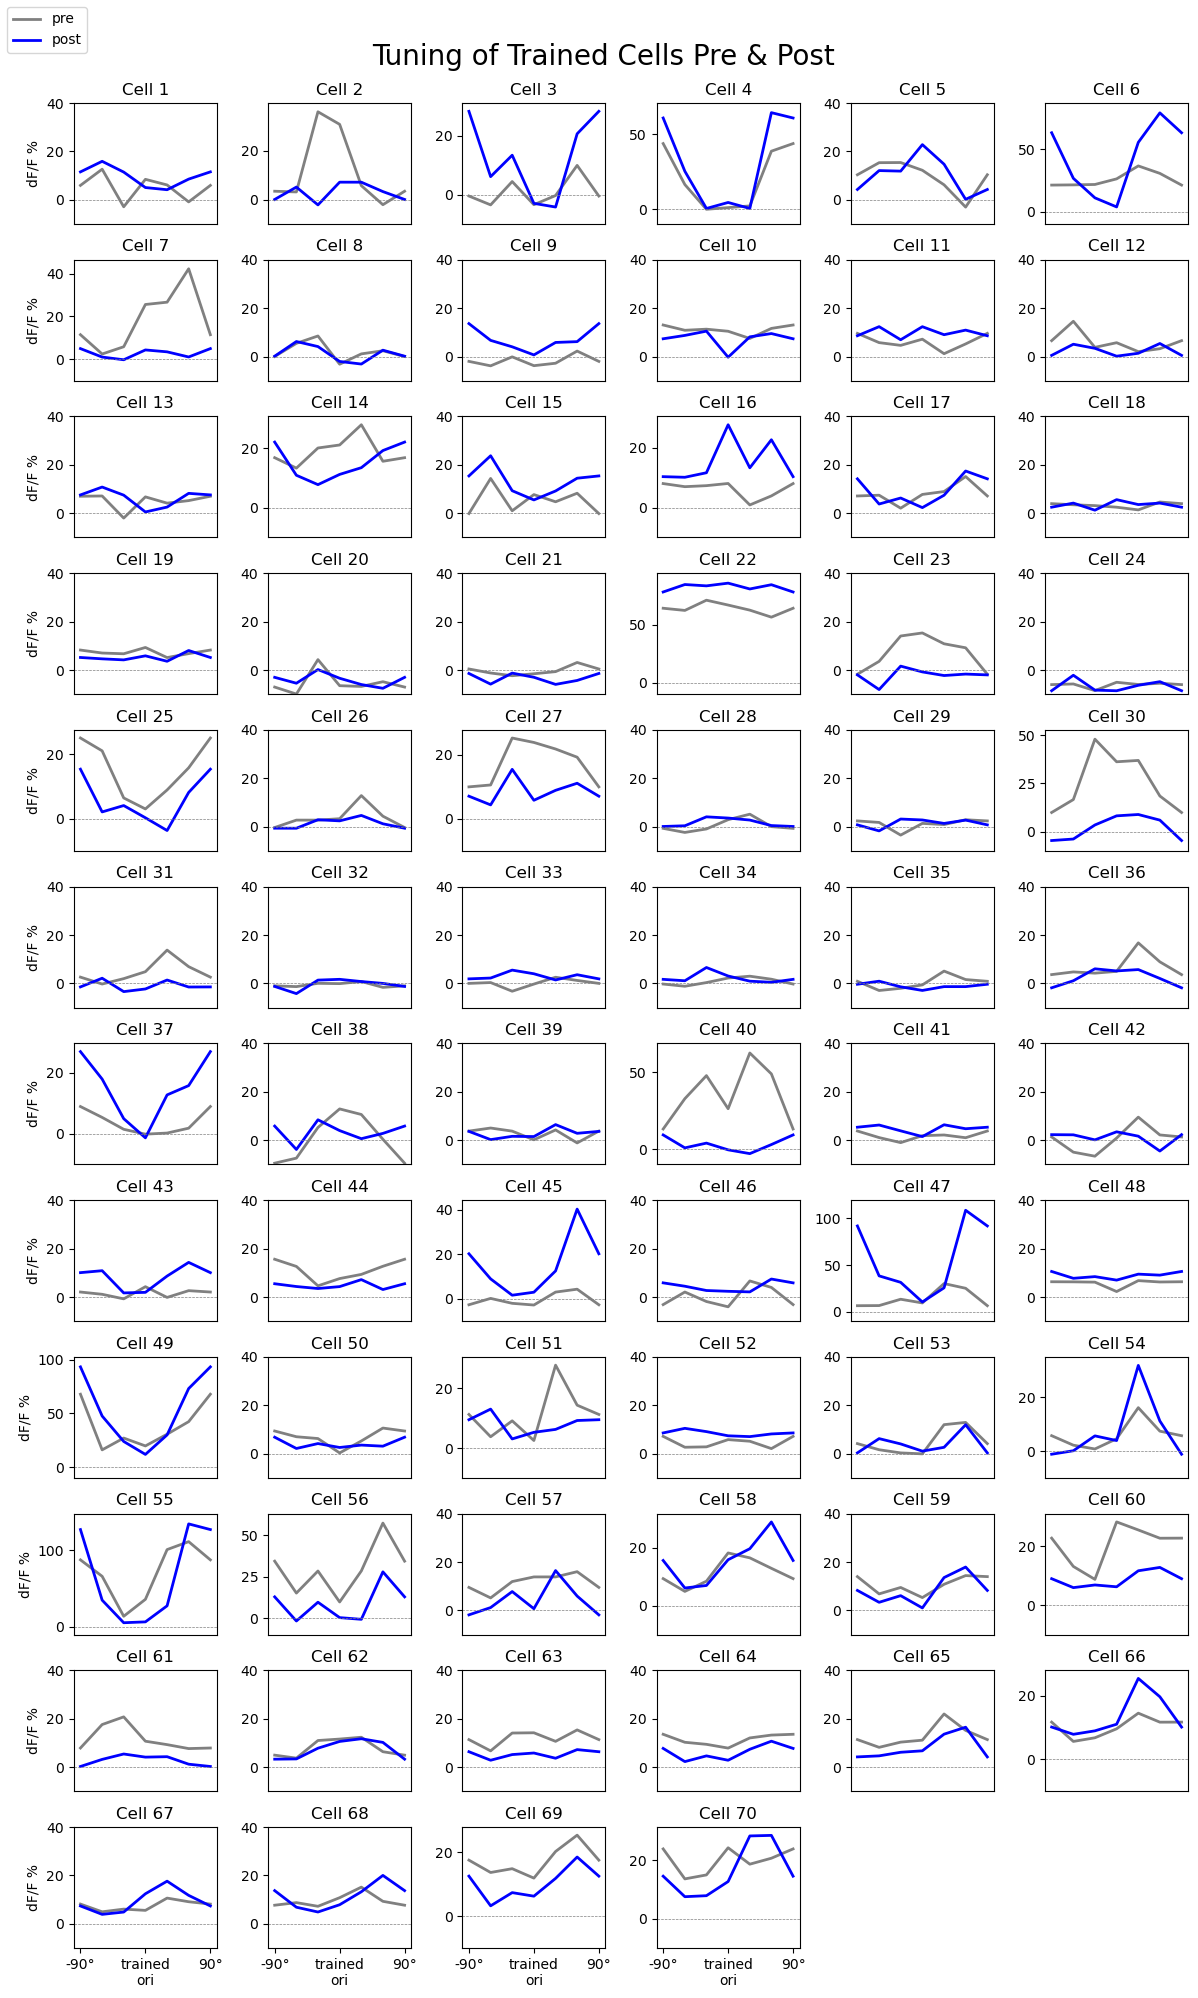

In [17]:
# Plotting all the pre- and post-tuning of each cell

# Set the dimensions of the subplot grid
cols = 6
rows = int(np.ceil(len(dfoF_V_change_bhStim)/cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

pre_color = 'gray'
post_color = 'blue'


axes = axes.flatten()

# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
        
    ax = axes[i]
    ax.plot(xs,bhStim_pre[i,:],lw=2,color=pre_color,label='pre')
    ax.plot(xs,bhStim_post[i,:],lw=2,color=post_color,label='post')
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    
    # # To account for a cell with higher responses & to add label to first plot  
    # if i == 21:
    #     ax.set_ylim([-100, 100])
    # elif i == 0:
    #     ax.set_ylabel("dF/F %")
    # else:
    #     ax.set_ylim([-10, 40])   
        
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    
    
    # Code to set the ylims based on values with a minimum of 25% 
    if any(bhStim_pre[i,:] > 25) or any(bhStim_post[i,:] > 25):
        y_max = np.max(np.concatenate((bhStim_pre[i,:],bhStim_post[i,:])))*1.1 # Making max ylim 1.1 
        ax.set_ylim([-10,y_max])
        
    else: 
        ax.set_ylim([-10, 40])   
        
    if i == 0:
        fig.legend(loc='upper left')
        
    # Setting only the first column to have y labels 
    if np.remainder(i,cols) == 0:
        ax.set_ylabel("dF/F %")
    
    # Setting only the last row to have x labels 
    if (rows*cols) - i - 1< cols:
        ax.set_xticks(
            ticks=[0, np.pi*0.5, np.pi],
            labels=["-90\u00b0", "trained\nori", "90\u00b0"])  
    else: 
        ax.set_xticks(
            ticks=[],
            labels=[])

# Removing axes greater than the number of cells 
for ind in range(rows*cols - dfoF_V_change_bhStim.shape[0]):
    ax = axes[dfoF_V_change_bhStim.shape[0] + ind]
    ax.axis('off') 
        
plt.tight_layout()
plt.rcParams.update({'font.size': 12}) 
fig.suptitle("Tuning of Trained Cells Pre & Post", fontsize = 20)
fig.subplots_adjust(top=0.95)

plt.show()

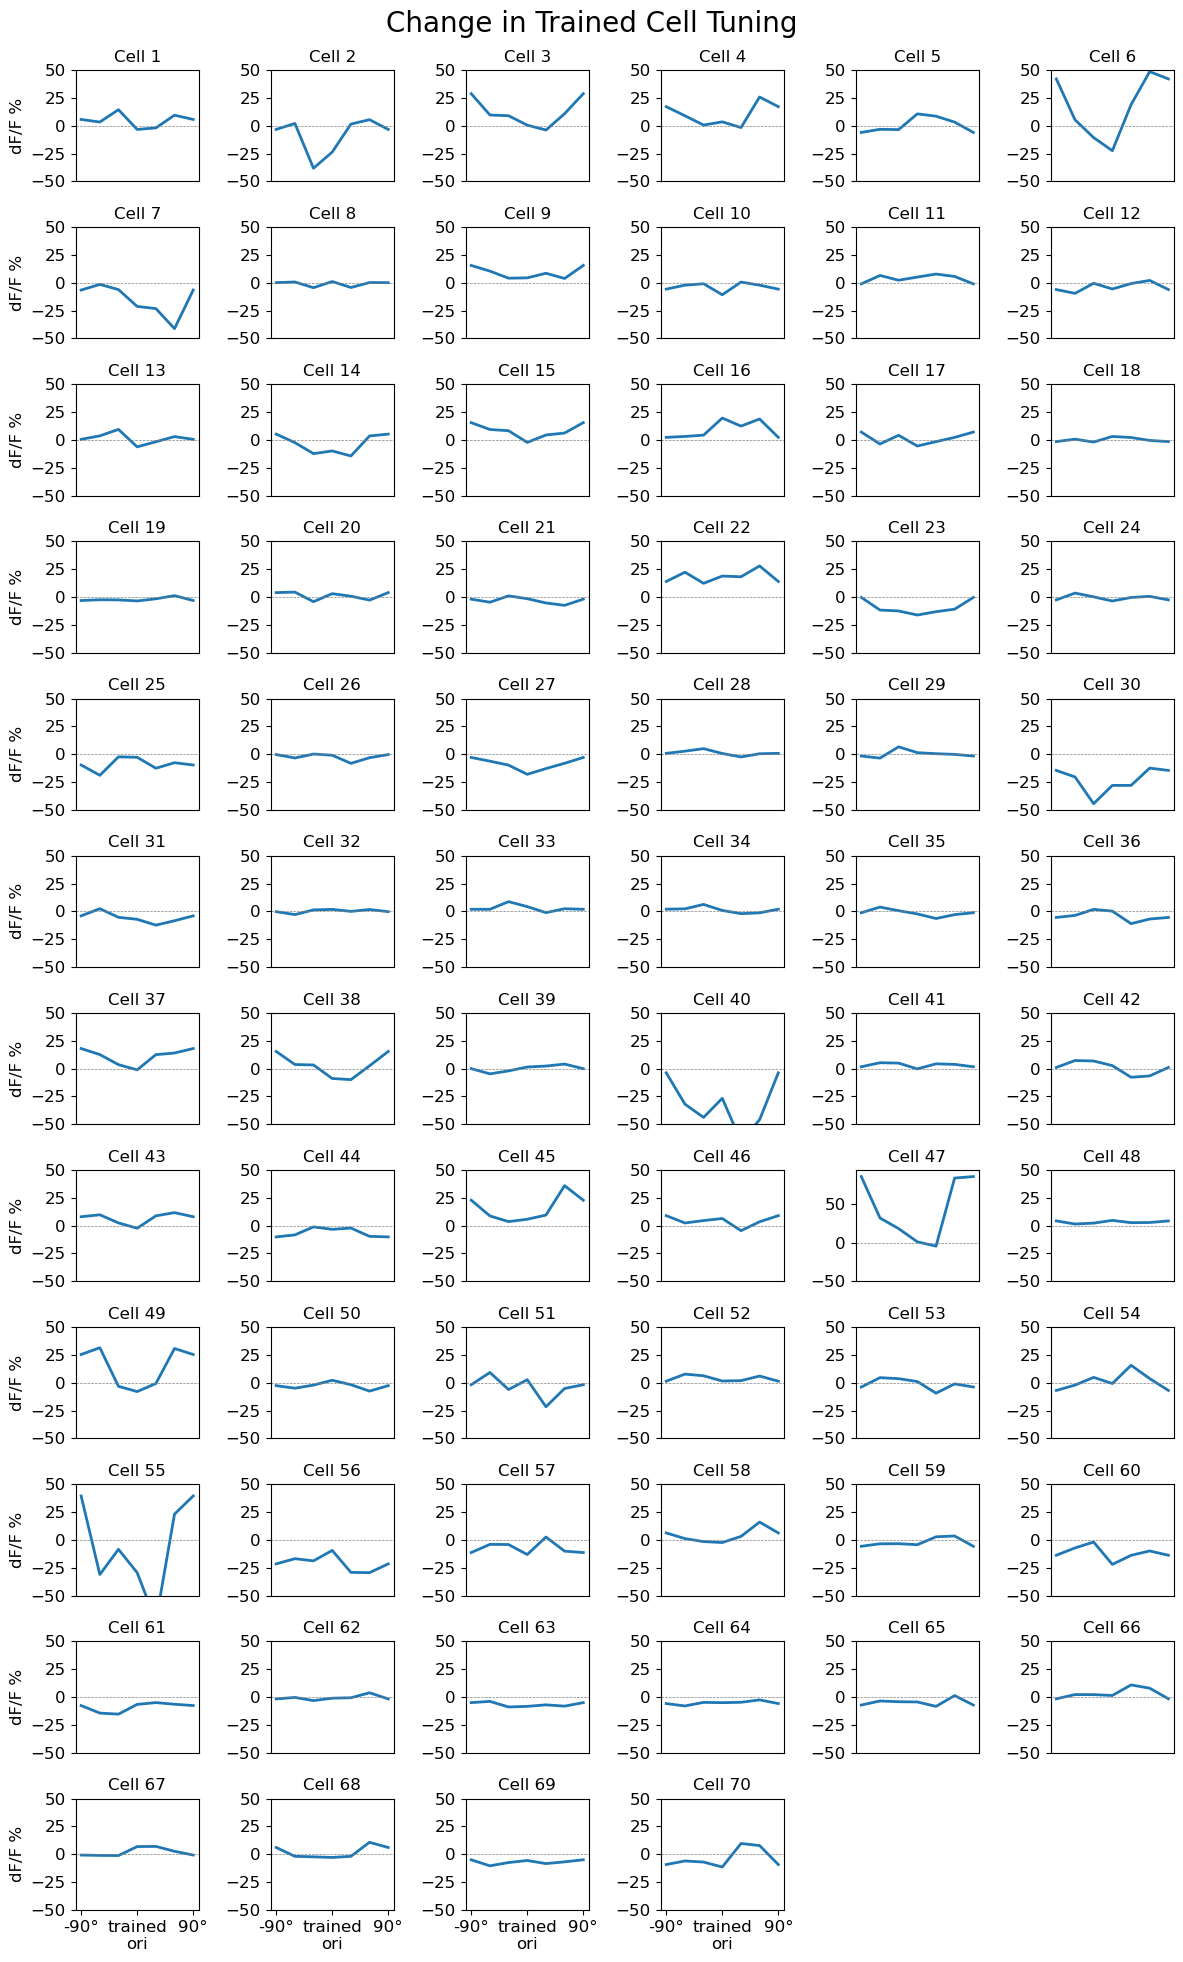

In [18]:
# Plotting the change in tuning for each cell 

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
axes = axes.flatten() # to make iterable

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

add_col = np.expand_dims(dfoF_V_change_bhStim[:,0],axis=1)
bhStim_total = np.append(dfoF_V_change_bhStim,add_col,axis=1)

# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
    ax = axes[i]
    ax.plot(xs,bhStim_total[i,:],lw=2)
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    #ax.set_ylim([-40, 40])
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    
    if i == 0:
        ax.set_ylabel('\u0394d F/F%')
        
        
    # Code to set the ylims based on values with a minimum of 25% 
    if any(bhStim_total[i,:] > 50):
        limit = bhStim_total[i,:]*1.1 # Making max ylim 1.1 
        y_max_ind = np.argmax(abs(limit)) 
        
        if limit[y_max_ind] > 0: 
            ax.set_ylim([-50,limit[y_max_ind]])
        else:
            ax.set_ylim([limit[y_max_ind],50])

    else: 
        ax.set_ylim([-50, 50])   
        
    # Setting only the first column to have y labels 
    if np.remainder(i,cols) == 0:
        ax.set_ylabel("dF/F %")
    
    # Setting only the last row to have x labels 
    if (rows*cols) - i - 1< cols:
        ax.set_xticks(
            ticks=[0, np.pi*0.5, np.pi],
            labels=["-90\u00b0", "trained\nori", "90\u00b0"])  
    else: 
        ax.set_xticks(
            ticks=[],
            labels=[])

# Removing axes greater than the number of cells 
for ind in range(rows*cols - dfoF_V_change_bhStim.shape[0]):
    ax = axes[dfoF_V_change_bhStim.shape[0] + ind]
    ax.axis('off') 

plt.tight_layout()
plt.rcParams.update({'font.size': 10}) 
fig.suptitle("Change in Trained Cell Tuning", fontsize = 20)
fig.subplots_adjust(top=0.95)

plt.show()

## Loading in Trial Data

In [14]:
data_dir = '\\Users\\Connor\\data-local\\250405'
pre_data = []
post_data = []

animals = os.listdir(data_dir)
for animal in animals: 
    animal_dir = data_dir+'\\'+animal
    inds = np.load(animal_dir+'\\stim_iC_manip.npy')

    # Store arrays as elements in a list, filtered by stimulated indicies
    pre_data.append(np.load(animal_dir+'\\dfof_cellTrials_pre.npy')[inds,:])
    post_data.append(np.load(animal_dir+'\\dfof_cellTrials_post.npy')[inds,:])

# Stack arrays in list to create one array 
pre_data = np.vstack(pre_data)
post_data = np.vstack(post_data)


## Calculating Average + Error in Stimulus Response Pre and Post

In [16]:
# Calculate dfof traces for each cell w mean and std to each stimulus and compare to loaded values, stim cells are 
pre_means = pre_data.mean(axis=2)
post_means = post_data.mean(axis=2) 
pre_err = stats.sem(pre_data,axis=2)
post_err = stats.sem(post_data,axis=2)

## Fitting Curves to Tuning Data

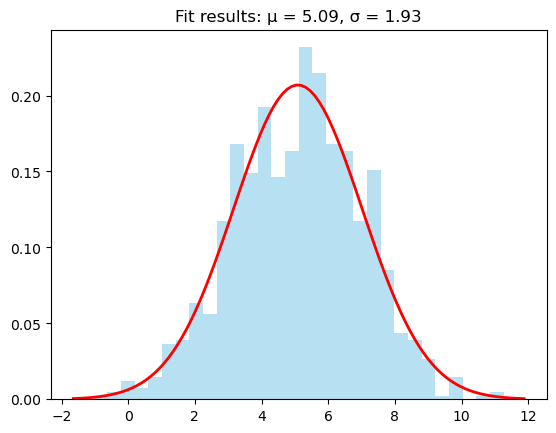

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some example data
data = np.random.normal(loc=5, scale=2, size=1000)

# Fit a Gaussian to the data
mu, std = norm.fit(vis)  # mu = mean, std = standard deviation

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')

# Plot the fitted Gaussian curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Get the PDF using the fitted parameters
plt.plot(x, p, 'r', linewidth=2)

plt.title(f"Fit results: μ = {mu:.2f}, σ = {std:.2f}")
plt.show()

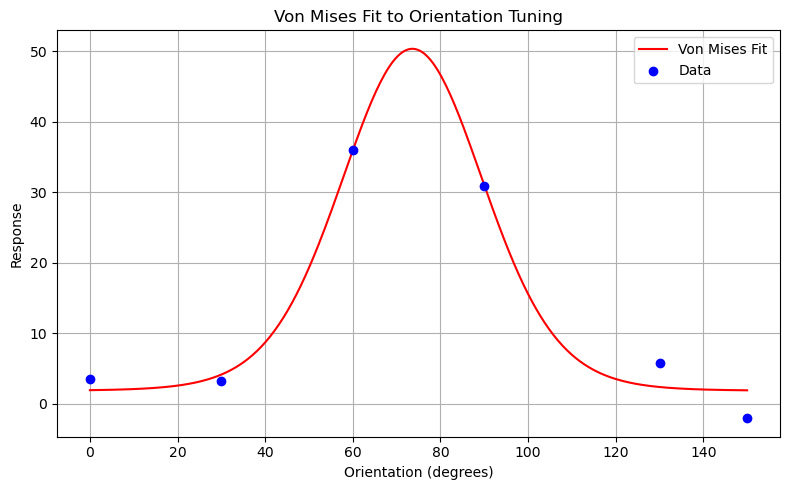

A = 2.01, κ = 3.18, μ = 73.60°, B = 1.77


In [185]:
from scipy.optimize import curve_fit


# Step 1: Input your data
orientations_deg = np.array([0, 30, 60, 90, 130, 150])
responses = visResp_behavStim_pre[1,:]

# Convert to radians
orientations_rad = np.deg2rad(orientations_deg)

# Step 2: Define von Mises tuning function
def von_mises_tuning(theta, A, kappa, mu, B):
    return A * np.exp(kappa * np.cos(2 * (theta - mu))) + B

# Step 3: Initial parameter guess: [A, kappa, mu, B]
initial_guess = [40, 1.0, np.pi/2, 0]

# Step 4: Curve fitting
params, _ = curve_fit(von_mises_tuning, orientations_rad, responses, p0=initial_guess)
A_fit, kappa_fit, mu_fit, B_fit = params

# Step 5: Plot result
theta_plot = np.linspace(0, np.pi*5/6, 300)  # 0° to 180° in radians
fit_response = von_mises_tuning(theta_plot, *params)

plt.figure(figsize=(8, 5))
plt.plot(np.rad2deg(theta_plot), fit_response, label="Von Mises Fit", color='r')
plt.scatter(orientations_deg, responses, label="Data", color='b', zorder=5)
plt.xlabel("Orientation (degrees)")
plt.ylabel("Response")
plt.title("Von Mises Fit to Orientation Tuning")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print fitted params
print(f"A = {A_fit:.2f}, κ = {kappa_fit:.2f}, μ = {np.rad2deg(mu_fit):.2f}°, B = {B_fit:.2f}")


In [ ]:
# from scipy.optimize import curve_fit

# orientations = np.array([0, 30, 60, 90, 130, 150])
# points_in_fit = 300 
    
# responses = visResp_behavStim_pre[1,:]  # example ΔF/F

# # Fit Parameters 
# A = np.max(responses)-np.min(responses) # Amplitude of curve 
# mu = orientations[np.argmax(responses)] # Max x-value 
# sigma = 20 # Guess for std of dist
# B = 0 # Using dF/F so baseline is assumed 0?

# # Initial parameter guess: [amplitude, center, width, baseline]
# initial_guess = [A,mu,sigma,B]

# # Fit Gaussian, cell 10 could not be fit for some reason so added exception clause
# params, _ = curve_fit(gaussian_tuning, orientations, responses, p0=initial_guess, maxfev=10000)
# A_fit, mu_fit, sigma_fit, B_fit = params

# # --- Generate fitted curve ---
# theta_fit = np.linspace(0, orientations[-1], points_in_fit)
# fit_response = gaussian_tuning(theta_fit, *params)
        
# # --- Plot ---
# plt.figure(figsize=(8, 5))
# plt.plot(theta_fit, fit_response, 'r-', label="Gaussian Fit")
# plt.scatter(orientations, responses, color='b', zorder=5, label="ΔF/F Data")
# plt.xlabel("Orientation (degrees)")
# plt.ylabel("ΔF/F")
# plt.title("Gaussian Fit to Orientation Tuning")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [288]:
from scipy.optimize import curve_fit

orientations = np.array([0, 30, 60, 90, 130, 150])
points_in_fit = 300 
fit_response = np.ndarray((visResp_behavStim_pre.shape[0],points_in_fit))
sigma_fit = np.ndarray((visResp_behavStim_pre.shape[0]))

# 🔧 Define a Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

for cell in range(visResp_behavStim_pre.shape[0]):
    
    responses = visResp_behavStim_pre[cell,:]  # example ΔF/F

    # Fit Parameters 
    A = np.max(responses)-np.min(responses) # Amplitude of curve 
    mu = orientations[np.argmax(responses)] # Max x-value 
    sigma = 10 # Guess for std of dist

    # Initial parameter guess: [amplitude, center, width, baseline]
    initial_guess = [A,mu,sigma]

    # Fit Gaussian, cell 10 could not be fit for some reason so added exception clause
    try: 
        params, _ = curve_fit(gaussian, orientations, responses, p0=initial_guess, maxfev=1000)
        A_fit, mu_fit, sigma_fit[cell] = params
        
        # --- Generate fitted curve ---
        theta_fit = np.linspace(0, orientations[-1], points_in_fit)
        fit_response[cell,:] = gaussian(theta_fit, *params)
        
    except RuntimeError:
        fit_response[cell,:] = [np.nan]*points_in_fit  

        

### Double-wide Gaussian

In [170]:
# Cannot do a double-wide gaussian because it depends on the tuning at 180 deg, which we don't have 
# https://journals.physiology.org/doi/full/10.1152/jn.2000.84.2.909

### Calculating Distribution Parameters

In [295]:
# First w Sci-Py, circv is a fit indpendent measure of tuning, essentially gOSI 
scpy = stats.circvar(visResp_behavStim_pre, high=np.pi, low=0,axis=1)

# Then manual to compare... 

# Calculating variance of our fits 
# Checking if sigma_fit is the same as std of the fit line, no std of points is different than std of distribution (i.e. width) 
std = np.var(fit_response, axis=1)

# std != sigma_fit..... 

# Calculating indices where x-values of data-points would be 
indices = np.array([np.abs(theta_fit - ori).argmin() for ori in orientations])

# Variance Accounted For (VAF) 
vaf = [(1 - np.var(visResp_behavStim_pre[cell,:] - fit_response[cell,indices])/np.var(visResp_behavStim_pre[cell,:]))*100 for cell in range(visResp_behavStim_pre.shape[0])]

# Calculate tuning width FWHM
fwhm = 2*np.sqrt(2*np.log(2))*sigma_fit

# Print metrics of fitting
p_cells_fit = len(np.where(~np.isnan(vaf))[0])/visResp_behavStim_pre.shape[0]*100
print("Cells fit succesfully: %.2f%%" %p_cells_fit)
print("Average variance accounted for: %.2f%%" %np.nanmean(vaf)) 

Cells fit succesfully: 68.57%
Average variance accounted for: 61.82%


In [299]:
vaf[3]

38.331796669387316

In [229]:
exp_params = pickle.load(open('/Users/phillipscm/data-local/i5214/suite2p/expt_params.pkl','rb')); #print('\npre_params)
trial_ftrace_pre_lseg.shape

# TODO: 

(1017, 16, 30, 140)

In [218]:
allTrialsV_pre = trial_ftrace_pre_lseg[:, iTrialVis, :, exp_params['nPreFr']:exp_params['nPreFr']+exp_params['nStimFrV']].max(axis=3)
allTrialsV_post = trial_ftrace_post_lseg[:, iTrialVis, :, br[1]:br[1]+exp_params['nStimFrV']].max(axis=3)

for iCell in stim_iC_quiet_real:
    dfoF_V_change_tuneplot = dfoF_V_avg_array_post_tuneplot[iCell]-dfoF_V_avg_array_pre_tuneplot[iCell]
        #get sem by sorting trials small to large
        allTrialsV_pre_sorted = np.full((6,30),np.nan)
        allTrialsV_post_sorted = np.full((6,30),np.nan)
        for ori in range(6):
            allTrialsV_pre_sorted[ori,:] = np.sort(allTrialsV_pre[iCell,ori,:])
            allTrialsV_post_sorted[ori,:] = np.sort(allTrialsV_post[iCell,ori,:])
        allTrialsV_change = allTrialsV_post_sorted-allTrialsV_pre_sorted
        sem_trials = stats.sem(allTrialsV_change,axis=1)
        sem_trials = np.concatenate((sem_trials,sem_trials[:1])) 

        fig= plt.figure(figsize=(6,4))
        font = {'size'   : 20}
        mpl.rc('font', **font)
        xs = [0,1,2,3,4,5,6]

        ax1 = fig.add_subplot()
        ax1.plot(xs,dfoF_V_change_tuneplot,lw=3,label='',color='grey')
        ax1.fill_between(xs,dfoF_V_change_tuneplot+sem_trials,dfoF_V_change_tuneplot-sem_trials,color='gray',alpha=0.2)
        ax1.set_xlabel('orientation')
        ax1.set_xticks([0,3,6]); ax1.set_xticklabels(['-90°','0°','90°'])
        ax1.set_ylabel('Δ in df/f',labelpad=0)#;ax1.set_yticks([-20,0,40])
        #ax1.set_xlim([-0.5,6.5]); ax1.set_xticklabels([' ',' ',' '])
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        #ax1.text(-0.4,-51,'-90°',c='forestgreen',weight='semibold')
        #ax1.text(2.88,-51,'0°',c='mediumorchid',weight='semibold')
        #ax1.text(5.75,-51,'90°',c='forestgreen',weight='semibold')
        ax1.axhline(c='grey',alpha=1,ls=':'); ax1.axvline(x=3,c='mediumorchid',alpha=0.7, ls='--',lw=3, label='target vis')
        ax1.legend(loc='lower left',fontsize=14,frameon=False)
        plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
        #plt.savefig(os.path.join('/Users/friedmanng/Desktop/data/all_experiments/2411_tunecurve/delta_i5273_cell'+str(iCell)+'.png'), bbox_inches='tight', dpi=400)


(array([ 5,  6,  9, 10, 16, 17, 24, 43, 47, 48, 49, 51, 54, 55, 58, 59, 63,
        64, 65, 66, 68, 69]),)

In [ ]:
# Plotting the change in tuning for each cell 

# Set the dimensions of the subplot grid
cols = 6
rows = int(np.ceil(len(dfoF_V_change_bhStim)/cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
axes = axes.flatten() # to make iterable

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]
# orientations = np.array([0, 30, 60, 90, 130, 150])


# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
    
    responses = visResp_behavStim_pre[i,:]  # example ΔF/F
    ax = axes[i]
    ax.plot(theta_fit, fit_response[i], 'r-', label="Fit")
    ax.scatter(orientations, responses, color='b', zorder=5,s=8, label="ΔF/F Data")
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    #ax.set_ylim([-40, 40])
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    
    if i == 0:
        ax.set_ylabel('\u0394d F/F%')
        
        
    # Code to set the ylims based on values with a minimum of 25% 
    if any(bhStim_total[i,:] > 50):
        limit = bhStim_total[i,:]*1.1 # Making max ylim 1.1 
        y_max_ind = np.argmax(abs(limit)) 
        
        if limit[y_max_ind] > 0: 
            ax.set_ylim([-50,limit[y_max_ind]])
        else:
            ax.set_ylim([limit[y_max_ind],50])

    else: 
        ax.set_ylim([-50, 50])   
        
    # Setting only the first column to have y labels 
    if np.remainder(i,cols) == 0:
        ax.set_ylabel("dF/F %")
    
    # Setting only the last row to have x labels 
    if (rows*cols) - i - 1< cols:
        ax.set_xticks(
            ticks=[0, np.pi*0.5, np.pi],
            labels=["-90\u00b0", "trained\nori", "90\u00b0"])  
    else: 
        ax.set_xticks(
            ticks=[],
            labels=[])

# Removing axes greater than the number of cells 
for ind in range(rows*cols - dfoF_V_change_bhStim.shape[0]):
    ax = axes[dfoF_V_change_bhStim.shape[0] + ind]
    ax.axis('off') 

plt.tight_layout()
plt.rcParams.update({'font.size': 10}) 
fig.suptitle("Gaussian Pre-Tuning Fit", fontsize = 20)
fig.subplots_adjust(top=0.95)
# fig.legend()
plt.show()


In [20]:
fit_response = np.ndarray((pre_data.shape[0],points_in_fit))
kappa_fit = np.ndarray((pre_data.shape[0]))
theta_fit = np.linspace(0, np.pi*5/6, 300)  # 0° to 180° in radians
FWHM_vm = np.ndarray((2,pre_data.shape[0]))

orientations_deg = np.array([0, 30, 60, 90, 130, 150])

# Looping through pre and post to get measures for both
for i_data, data in enumerate([pre_data,post_data]):
    print(data.shape)
    # Iterate through each cell
    for i in range(pre_data.shape[0]):

        # Step 1: Input your data
        responses = data[i,:]
        
        # Convert to radians
        orientations_rad = np.deg2rad(orientations_deg)

        # Step 2: Define von Mises tuning function
        def von_mises_tuning(theta, A, kappa, mu, B):
            return A * np.exp(kappa * np.cos(2 * (theta - mu))) + B

        # Step 3: Initial parameter guess: [A, kappa, mu, B]
        # A = 30
        # kappa = 1
        # mu = np.pi/2
        # B = 0
        # initial_guess = [A, kappa, mu, B]

        try:
            # Step 4: Curve fitting
            params, _ = curve_fit(von_mises_tuning, orientations_rad, responses)
            A_fit, kappa_fit[i], mu_fit, B_fit = params

            # Step 5: Plot result
            fit_response[i,:] = von_mises_tuning(theta_fit, *params)

             # Calculate the FWHM for each cell
            peak_val = fit_response[i,:].max()
            peak_ind = np.abs(fit_response[i,:] - peak_val).argmin()
            half_max = peak_val / 2

            # Calculating indices where x-values of data-points would be 
            half_ind = np.abs(fit_response[i,:] - half_max).argmin()
            FWHM_vm[i_data,i] = theta_fit[peak_ind] - theta_fit[half_ind]

        except RuntimeError:
            fit_response[i,:] = [np.nan]*points_in_fit  
            FWHM_vm[i_data,i] = np.nan


NameError: name 'points_in_fit' is not defined

### Stats for von mises

In [313]:
FWHM_vm = np.rad2deg(np.abs(FWHM_vm))

# Calculating indices where x-values of data-points would be 
indices = np.array([np.abs(np.rad2deg(theta_fit) - ori).argmin() for ori in orientations])

# Variance Accounted For (VAF) 
vaf = [(1 - np.var(visResp_behavStim_pre[cell,:] - fit_response[cell,indices])/np.var(visResp_behavStim_pre[cell,:]))*100 for cell in range(visResp_behavStim_pre.shape[0])]

# Print metrics of fitting
print("Cells fit succesfully: %i" %len(np.where(~np.isnan(vaf))[0]))
print("Average variance accounted for: %.2f%%" %np.nanmean(vaf)) 

Cells fit succesfully: 45
Average variance accounted for: -149.38%


In [310]:
vaf[3]

nan

In [ ]:
### Plot distribution of FWHM for pre and post

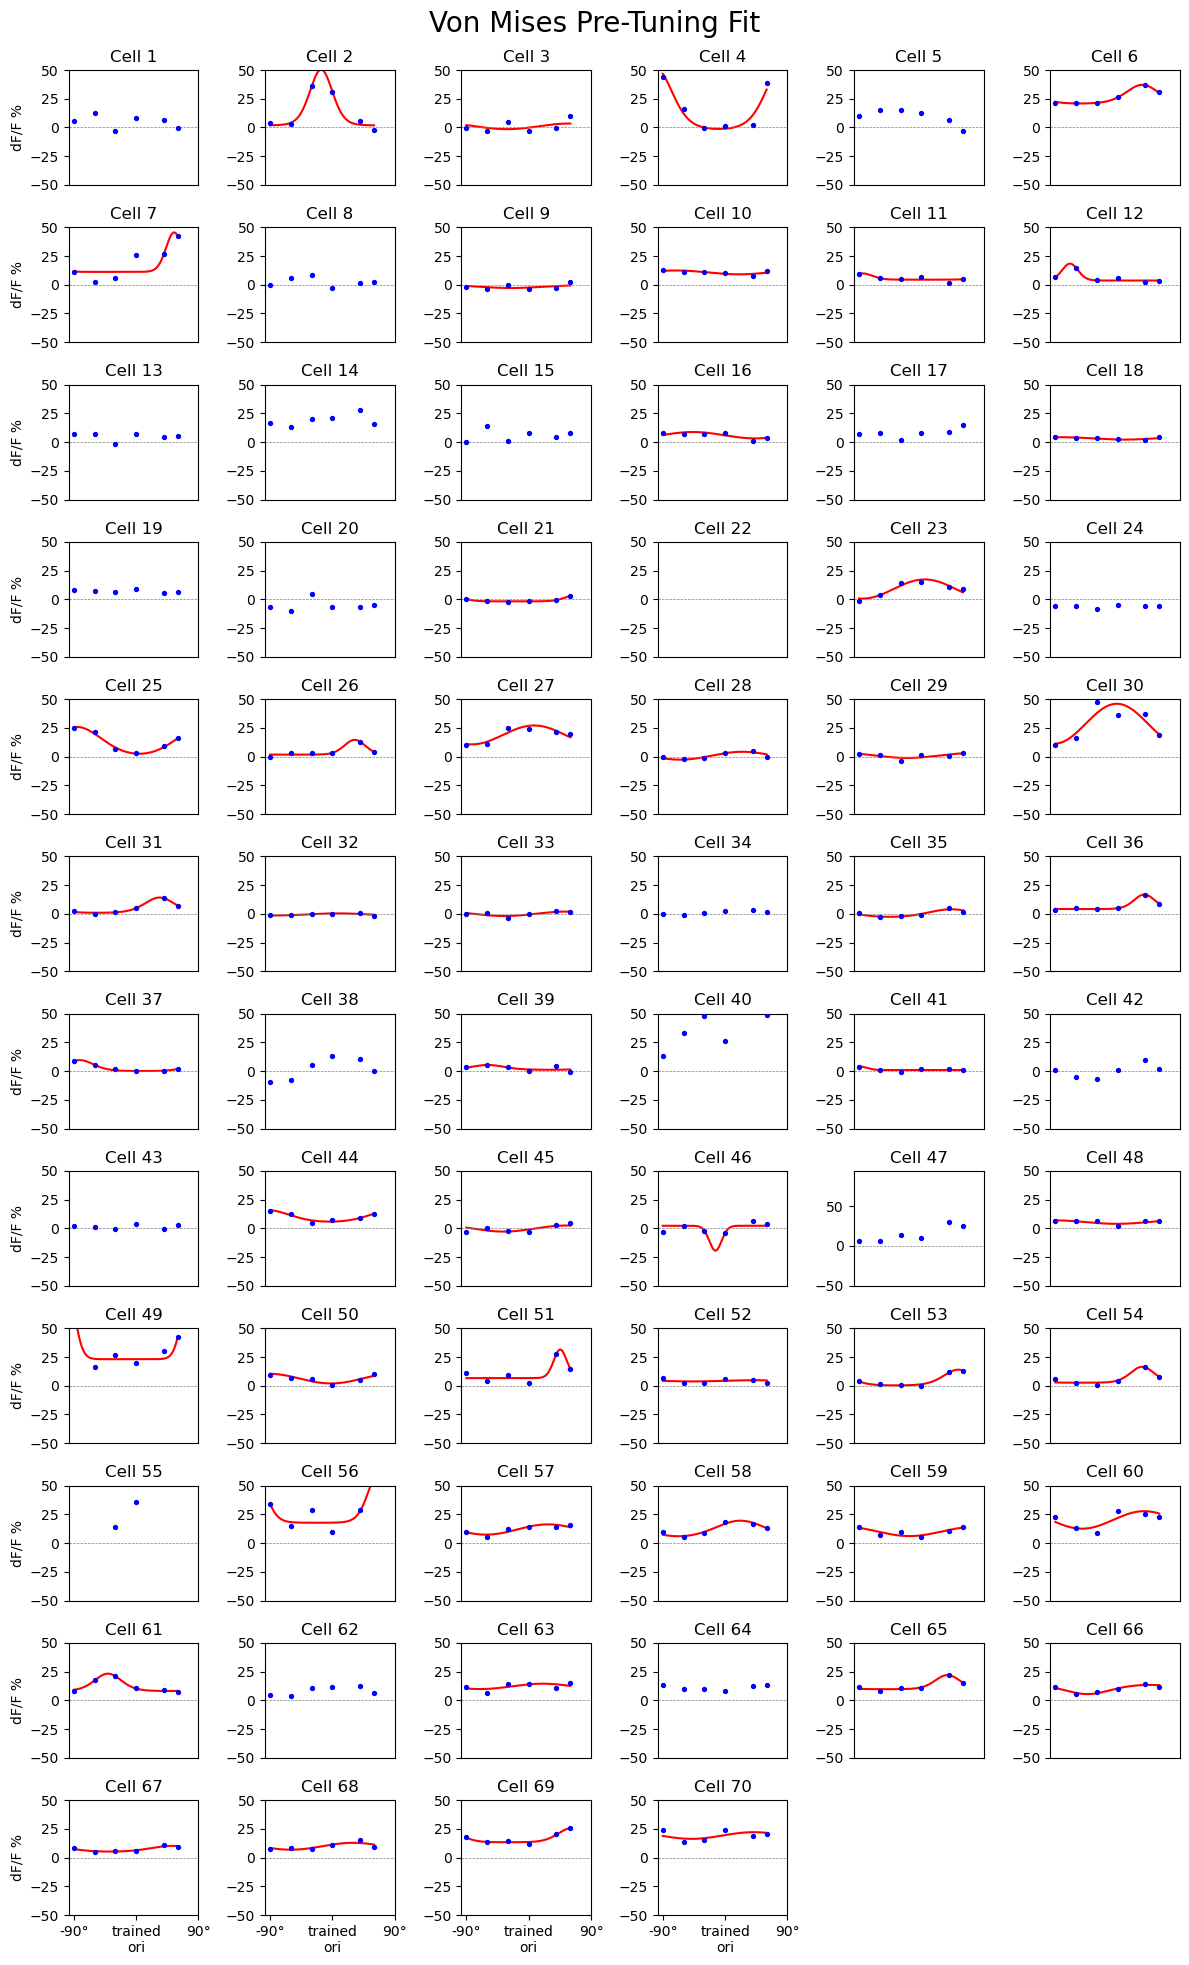

In [243]:
# Plotting the change in tuning for each cell 
from scipy.optimize import curve_fit

# Set the dimensions of the subplot grid
cols = 5
rows = int(np.ceil(len(pre_data)/cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
axes = axes.flatten() # to make iterable

# Step 1: Input your data
orientations = np.array([0, 30, 60, 90, 130, 150])
orientations_rad = np.deg2rad(orientations)

# Iterate through each subplot
for i in range(pre_data.shape[0]):

    responses = pre_data[i,:]
    
    ax = axes[i]
    ax.plot(theta_fit, fit_response[i,:], 'r-', label="Fit")
    ax.scatter(orientations_rad, responses, color='b', zorder=5, s=8, label="ΔF/F Data")
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    #ax.set_ylim([-40, 40])
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    
    if i == 0:
        ax.set_ylabel('\u0394d F/F%')
        
        
    # Code to set the ylims based on values with a minimum of 25% 
    if any(bhStim_total[i,:] > 50):
        limit = bhStim_total[i,:]*1.1 # Making max ylim 1.1 
        y_max_ind = np.argmax(abs(limit)) 
        
        if limit[y_max_ind] > 0: 
            ax.set_ylim([-50,limit[y_max_ind]])
        else:
            ax.set_ylim([limit[y_max_ind],50])

    else: 
        ax.set_ylim([-50, 50])   
        
    # Setting only the first column to have y labels 
    if np.remainder(i,cols) == 0:
        ax.set_ylabel("dF/F %")
    
    # Setting only the last row to have x labels 
    if (rows*cols) - i - 1< cols:
        ax.set_xticks(
            ticks=[0, np.pi*0.5, np.pi],
            labels=["-90\u00b0", "trained\nori", "90\u00b0"])  
    else: 
        ax.set_xticks(
            ticks=[],
            labels=[])

# Removing axes greater than the number of cells 
for ind in range(rows*cols - dfoF_V_change_bhStim.shape[0]):
    ax = axes[dfoF_V_change_bhStim.shape[0] + ind]
    ax.axis('off') 

plt.tight_layout()
plt.rcParams.update({'font.size': 10}) 
fig.suptitle("Von Mises Pre-Tuning Fit", fontsize = 20)
fig.subplots_adjust(top=0.95)

plt.show()


# # --- Plot ---
# plt.figure(figsize=(8, 5))
# plt.plot(theta_fit, fit_response, 'r-', label="Gaussian Fit")
# plt.scatter(orientations, responses, color='b', zorder=5, label="ΔF/F Data")
# plt.xlabel("Orientation (degrees)")
# plt.ylabel("ΔF/F")
# plt.title("Gaussian Fit to Orientation Tuning (Calcium Imaging)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

(array([  1.,   5.,  31., 128., 267., 380., 146.,  30.,   7.,   5.]),
 array([-3.12531036, -2.51470703, -1.90410371, -1.29350039, -0.68289707,
        -0.07229375,  0.53830958,  1.1489129 ,  1.75951622,  2.37011954,
         2.98072286]),
 <BarContainer object of 10 artists>)

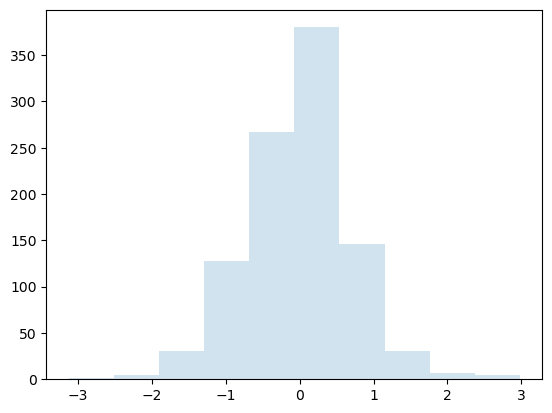

In [ ]:
from scipy.stats import vonmises

kappa = 3
r = vonmises.rvs(kappa, size=1000)
t = vonmises.fit(r, fscale=1)

plt.hist(r,alpha=0.2)

## Other test code

In [30]:
import scipy.special as special
import scipy.optimize as opt

# fit von mises pdf, returns parameters and their variances
def fit_vmCustom(xdata,ydata):
    # bounds for parameter search
    bounds = ([-np.pi,0,0,-np.inf],[np.pi,np.inf,np.inf,np.inf])
    # If fit doesn't work fill w NaN
    try:
        paramFits = opt.curve_fit(vmCustom,xdata,ydata,bounds=bounds,max_nfev=1000)
    except:
        paramFits = (np.full(4, np.nan), np.full((4,4), np.nan))
    return paramFits[0]

# von mises pdf, plus scale parameter
def vmCustom(x,mu,kappa,scale,intercept):
    numerator = np.exp(kappa*np.cos(x-mu))
    denom = np.pi*special.iv(0,kappa) # removed multiple 2 in front of pi 
    
    return ((numerator/denom)*scale)+intercept

In [31]:
theta = np.linspace(0, np.pi*5/6, 6)*2 #0 to 150 degrees #theta = np.linspace(0, np.pi*5/6, 6)
ydata_resp = visResp_behavStim_pre[6,:]
paramFits = fit_vmCustom(theta,ydata_resp) #paramFits: mu,kappa,scale,intercept
estimatedFit = vmCustom(theta,paramFits[0],paramFits[1],paramFits[2],paramFits[3])

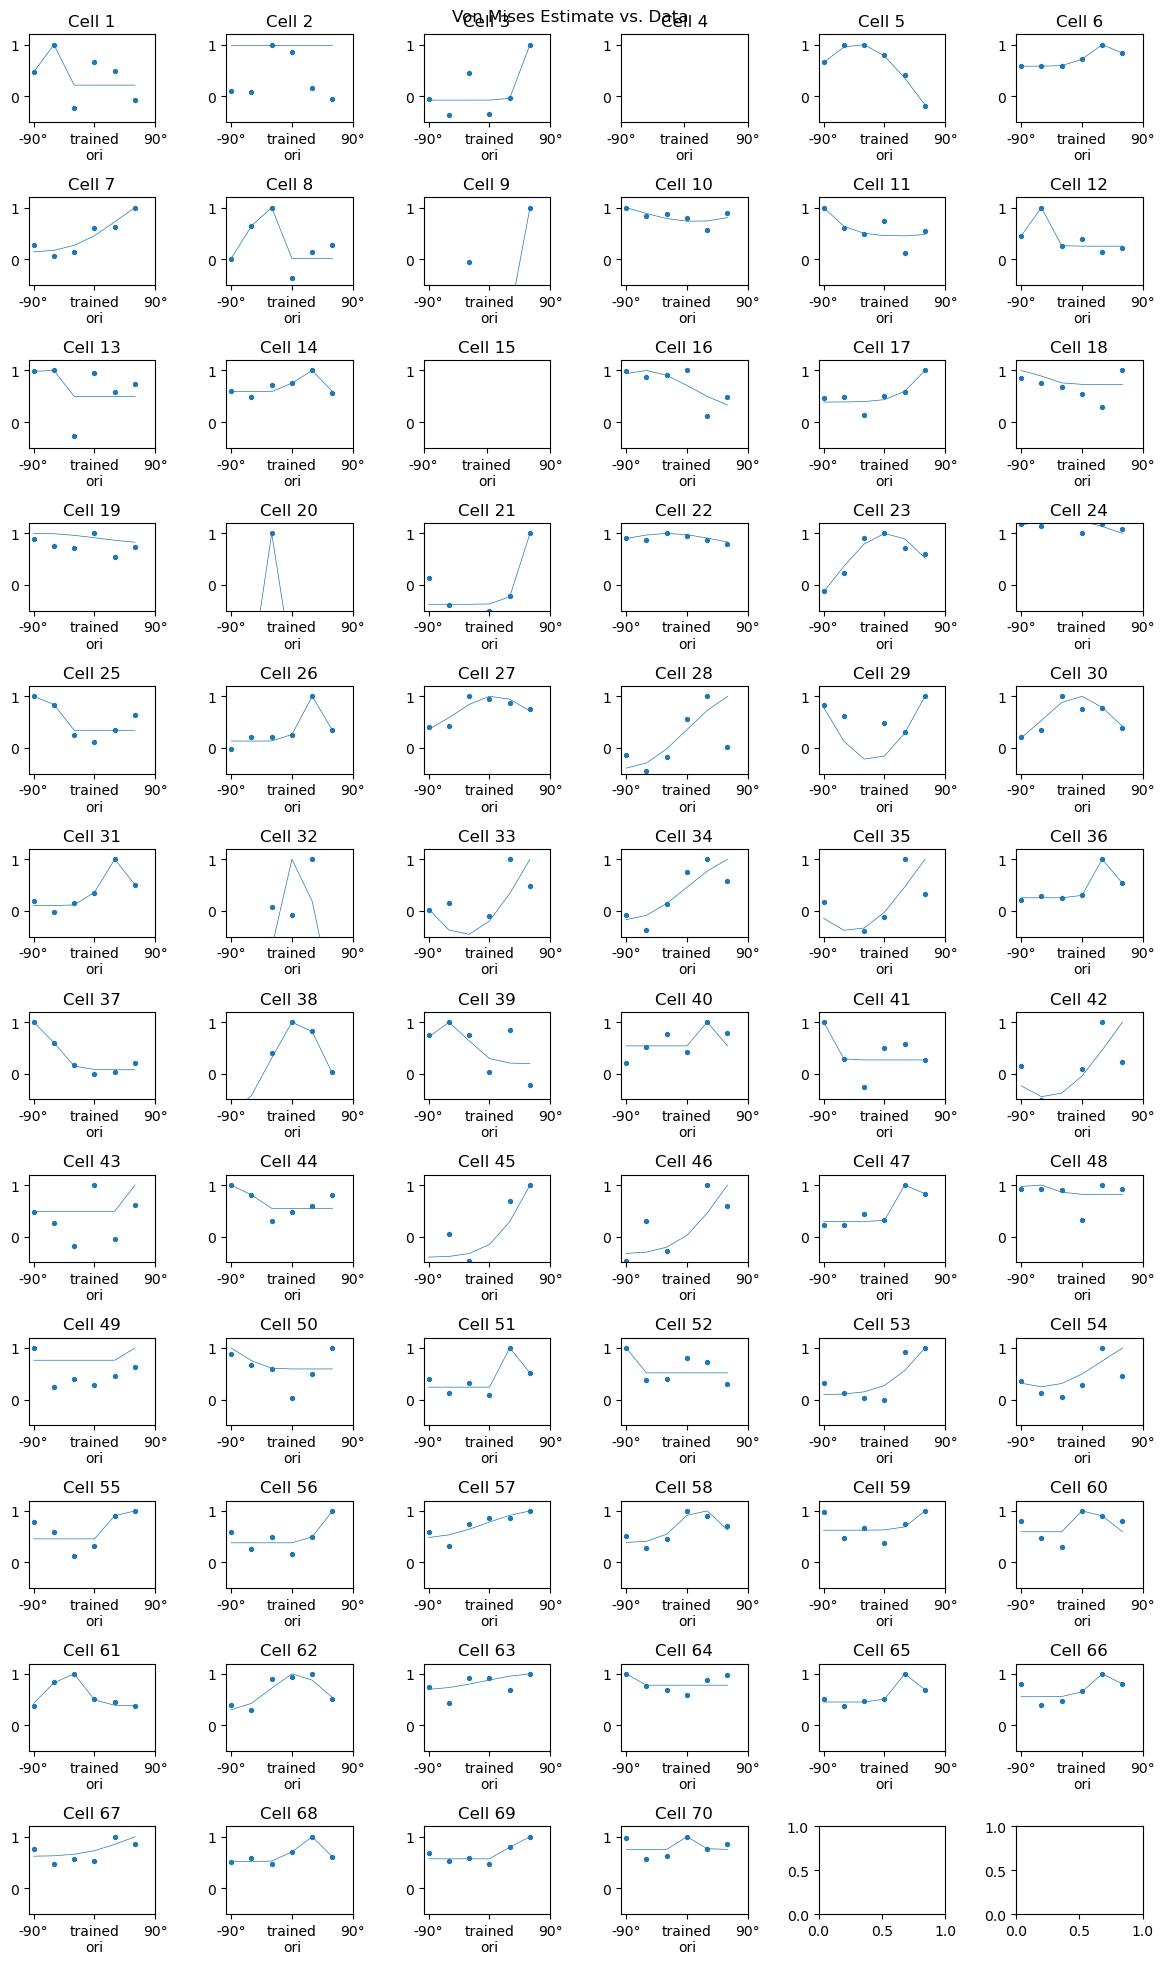

In [178]:
#fig, ax = plt.subplots(1,2,figsize=r_[2,1]*2,sharey=True); font = {'size'   : 10}; mpl.rc('font', **font); ax = ax.ravel()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
ax = axes.flatten() # to make iterable

# Iterate through each subplot
theta = np.linspace(0, np.pi*5/6, 6) #0 to 150 degrees #theta = np.linspace(0, np.pi*5/6, 6)
kappa = []

for iC in range(visResp_behavStim_pre.shape[0]):
    ydata_resp = visResp_behavStim_pre[iC,:]
    #if ydata_resp.max() > 10 and ydata_resp.max() < 14:
    paramFits = fit_vmCustom(theta,ydata_resp) #paramFits: mu,kappa,scale,intercept; paramFits2=alt
    estimatedFit = vmCustom(theta,paramFits[0],paramFits[1],paramFits[2],paramFits[3])
    estimatedFit = estimatedFit/estimatedFit.max()
    rescale = visResp_behavStim_pre[iC,:]/visResp_behavStim_pre[iC,:].max()
    if not np.isnan(estimatedFit).all():
        ax[iC].plot(theta,estimatedFit,lw=0.5)
        ax[iC].scatter(theta,rescale, s=8)
    kappa.append(paramFits[1])
    
    ax[iC].set_title(f'Cell {iC + 1}', fontsize=12)
    ax[iC].set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])

    if i == 0:
        ax[iC].set_ylabel('\u0394d F/F%')
        
    ax[iC].set_ylim([-0.5,1.2]);

fig.suptitle("Von Mises Estimate vs. Data");#ax[iC].set_xticks([0,round(np.pi),round(np.pi*2)])
fig.subplots_adjust(top=0.95)
plt.tight_layout()

plt.show()


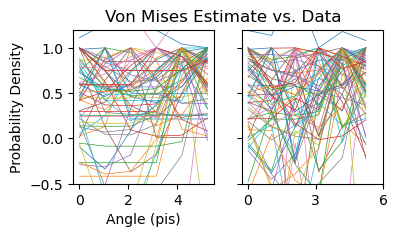

In [144]:
fig, ax = plt.subplots(1,2,figsize=r_[2,1]*2,sharey=True); font = {'size'   : 10}; mpl.rc('font', **font); ax = ax.ravel()
theta = np.linspace(0, np.pi*5/6, 6)*2 #0 to 150 degrees #theta = np.linspace(0, np.pi*5/6, 6)
kappa = []
for iC in range(visResp_behavStim_pre.shape[0]):
    ydata_resp = visResp_behavStim_pre[iC,:]
    #if ydata_resp.max() > 10 and ydata_resp.max() < 14:
    paramFits = fit_vmCustom(theta,ydata_resp) #paramFits: mu,kappa,scale,intercept; paramFits2=alt
    estimatedFit = vmCustom(theta,paramFits[0],paramFits[1],paramFits[2],paramFits[3])
    estimatedFit = estimatedFit/estimatedFit.max()
    rescale = visResp_behavStim_pre[iC,:]/visResp_behavStim_pre[iC,:].max()
    if not np.isnan(estimatedFit).all():
        ax[0].plot(theta,estimatedFit,lw=0.5)
        ax[1].plot(theta,rescale,lw=0.5)
    kappa.append(paramFits[1])
fig.suptitle("Von Mises Estimate vs. Data");ax[1].set_xticks([0,round(np.pi),round(np.pi*2)])
ax[0].set_xlabel("Angle (pis)"); ax[0].set_ylabel("Probability Density");ax[0].set_ylim([-0.5,1.2]);

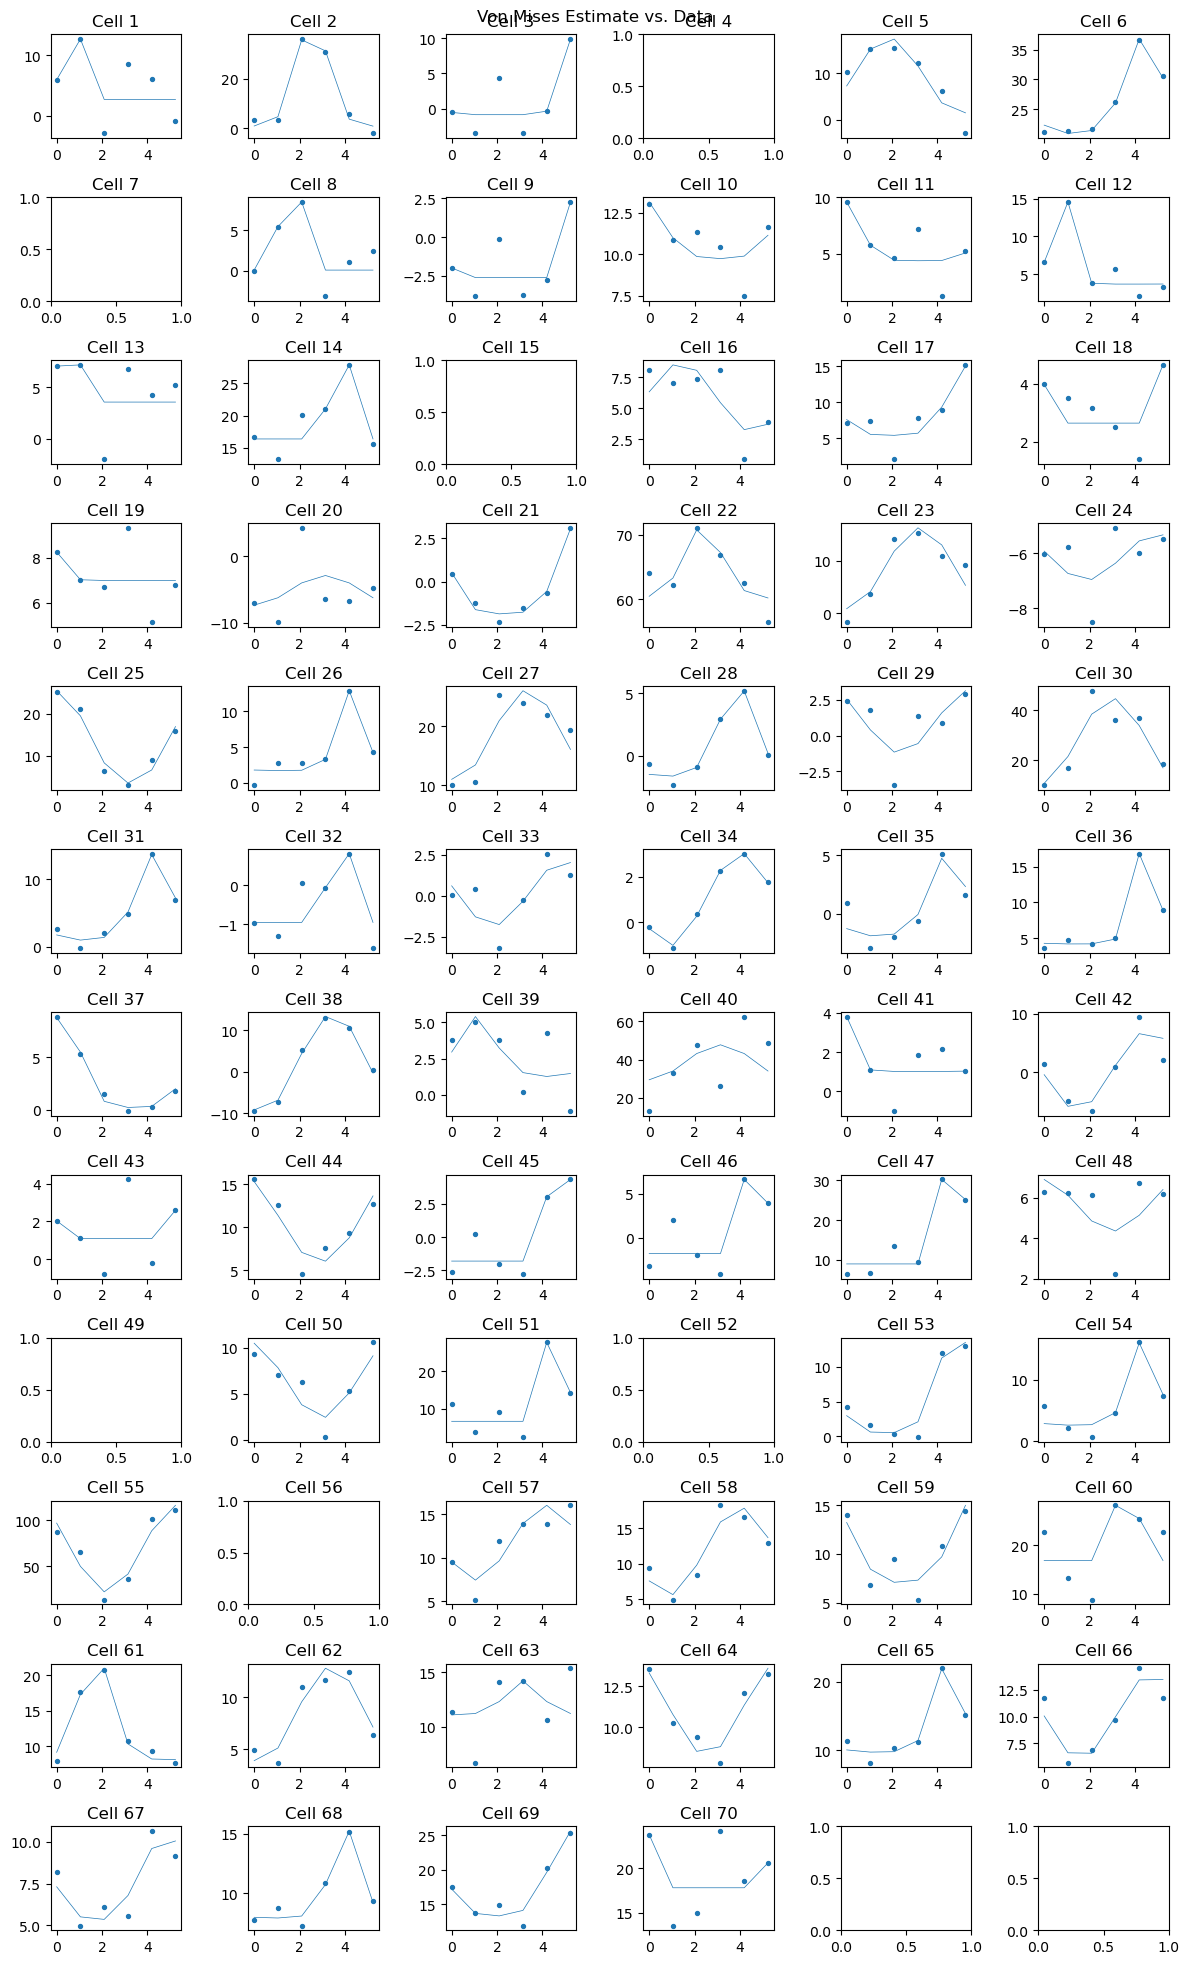

In [149]:
#fig, ax = plt.subplots(1,2,figsize=r_[2,1]*2,sharey=True); font = {'size'   : 10}; mpl.rc('font', **font); ax = ax.ravel()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
ax = axes.flatten() # to make iterable

# Iterate through each subplot
theta = np.linspace(0, np.pi*5/6, 6)*2 #0 to 150 degrees #theta = np.linspace(0, np.pi*5/6, 6)
kappa = []

for iC in range(visResp_behavStim_pre.shape[0]):
    ydata_resp = visResp_behavStim_pre[iC,:]
    #if ydata_resp.max() > 10 and ydata_resp.max() < 14:
    paramFits = fit_vmCustom(theta,ydata_resp) #paramFits: mu,kappa,scale,intercept; paramFits2=alt
    estimatedFit = vmCustom(theta,paramFits[0],paramFits[1],paramFits[2],paramFits[3])
    # estimatedFit = estimatedFit/estimatedFit.max()
    rescale = visResp_behavStim_pre[iC,:]/visResp_behavStim_pre[iC,:].max()
    if not np.isnan(estimatedFit).all():
        ax[iC].plot(theta,estimatedFit,lw=0.5)
        ax[iC].scatter(theta,visResp_behavStim_pre[iC,:], s=8)
    kappa.append(paramFits[1])
    
    ax[iC].set_title(f'Cell {iC + 1}', fontsize=12)
    # ax[iC].set_xticks(
    #     ticks=[0, np.pi*0.5, np.pi],
    #     labels=["-90\u00b0", "trained\nori", "90\u00b0"])

    if i == 0:
        ax[iC].set_ylabel('\u0394d F/F%')
        
fig.suptitle("Von Mises Estimate vs. Data");#ax[iC].set_xticks([0,round(np.pi),round(np.pi*2)])
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()


# ax[iC].set_xlabel("Angle (pis)"); ax[iC].set_ylabel("Probability Density");ax[iC].set_ylim([-0.5,1.2]);

Explained variance ratio: [0.56074722 0.26659075]
Principal components:
 [[ 0.39510882  0.43009451  0.36991873  0.28736219  0.2936915   0.44398781
   0.39510882]
 [ 0.44464685 -0.13597733 -0.29255439 -0.49225374 -0.4631313   0.20903616
   0.44464685]]


/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_13384/2032156950.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', edgecolor='k', alpha=0.7)


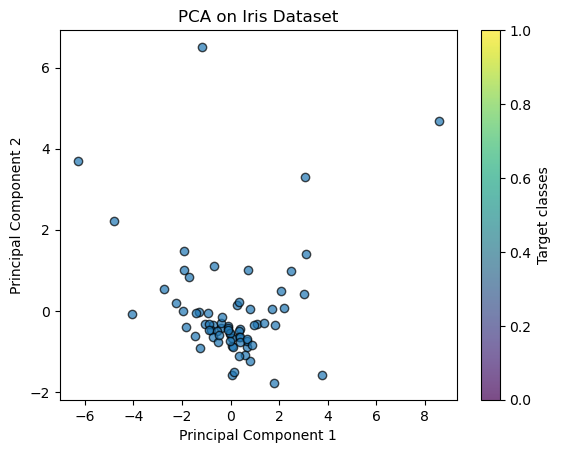

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

X = bhStim_total

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components:\n", pca.components_)

# Scatter plot of the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.colorbar(label='Target classes')
plt.show()

In [ ]:
import numpy as np
from scipy.special import i0
from scipy.integrate import quad
from scipy.optimize import minimize

# von Mises PDF (unnormalized)
def von_mises_pdf(theta, mu, kappa):
    return np.exp(kappa * np.cos(theta - mu)) / (2 * np.pi * i0(kappa))

# Truncated PDF
def truncated_von_mises_pdf(theta, mu, kappa, a, b):
    normalization, _ = quad(lambda t: von_mises_pdf(t, mu, kappa), a, b)
    return von_mises_pdf(theta, mu, kappa) / normalization

# Negative log-likelihood
def neg_log_likelihood(params, data, a, b):
    mu, kappa = params
    if kappa <= 0:
        return np.inf  # kappa must be positive
    pdf_vals = [truncated_von_mises_pdf(x, mu, kappa, a, b) for x in data]
    return -np.sum(np.log(pdf_vals))

# Example usage
data = np.random.uniform(0, np.pi, size=100)  # Replace with your actual data
a, b = 0, np.pi
initial_guess = [np.pi/2, 1.0]

result = minimize(neg_log_likelihood, initial_guess, args=(data, a, b), bounds=[(0, 2*np.pi), (1e-3, None)])
mu_hat, kappa_hat = result.x

print("Estimated mu:", mu_hat)
print("Estimated kappa:", kappa_hat)

theta_vals = np.linspace(0, np.pi, 300)
pdf_vals = [truncated_von_mises_pdf(theta, mu_hat, kappa_hat, a, b) for theta in theta_vals]

plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, range=(0, np.pi), density=True, alpha=0.5, label="Data histogram")
plt.plot(theta_vals, pdf_vals, 'r-', linewidth=2, label="Fitted truncated von Mises")
plt.title("Fitted Truncated von Mises Distribution")
plt.xlabel("θ (radians)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Average Tuning Plots

In [11]:
np.logical_and(pre_quiet_cells[group],post_quiet_cells[group])

NameError: name 'pre_quiet_cells' is not defined

In [44]:
# Cell that calculates quiet cells in trained and control populations 
quiet_cell_threshold = 10 # Percent
group_names = ["Trained", "Control"]
qc_store_pre = []
qc_store_post = []
stay_qc_store = []

ctrl_vis_pre = visResp_notStim_pre[i_notStimResponsive,:]
ctrl_vis_post = visResp_notStim_post[i_notStimResponsive,:]

# Trained and control data for pre and post 
pre_data = [visResp_behavStim_pre, 
            ctrl_vis_pre]

post_data = [visResp_behavStim_post,
             ctrl_vis_post]

trained = 0 
control = 1 

# Looping through trained and control data
for group in range(2): 
    
    pre = pre_data[group] 
    post = post_data[group] 
    
    # Calculating the number of quiet cells in our data
    # loop through cells (row) and find which rows have all entries less that threshold (some dF/F percentage) 
    pre_quiet_cells = [np.all(np.abs(pre[row,:]) < quiet_cell_threshold) for row in range(pre.shape[0])] 
    post_quiet_cells = [np.all(np.abs(post[row,:]) < quiet_cell_threshold) for row in range(post.shape[0])]
    stay_quiet_cells = np.logical_and(pre_quiet_cells,post_quiet_cells)
    
    # Print Block for Info
    print("%s Cells" %group_names[group])
    print("Number of starting quiet cells: %i" % len([i for i, x in enumerate(pre_quiet_cells) if x])) # If x (entry) is True, store index i then count list
    print("Number of ending quiet cells: %i" % len([i for i, x in enumerate(post_quiet_cells) if x]))
    print("Cells that remained quiet: %i" % len([i for i, x in enumerate(stay_quiet_cells) if x]))
    percent_stay_quiet = len([i for i, x in enumerate(stay_quiet_cells) if x])/pre.shape[0]*100
    print("Percent of cells that remained quiet: %i%%\n" % int(percent_stay_quiet))
    
    # Append arrays for later use, remember index [0] is trained cells index [1] is post
    qc_store_pre.append([pre_quiet_cells])
    qc_store_post.append(post_quiet_cells)
    stay_qc_store.append(stay_quiet_cells)
    
# Pulling out stay quiet cells for data analysis in case
trained_stay_quiet_cells = stay_qc_store[trained]
ctrl_stay_quiet_cells = stay_qc_store[control] 

Trained Cells
Number of starting quiet cells: 26
Number of ending quiet cells: 30
Cells that remained quiet: 16
Percent of cells that remained quiet: 22%

Control Cells
Number of starting quiet cells: 121
Number of ending quiet cells: 135
Cells that remained quiet: 92
Percent of cells that remained quiet: 33%



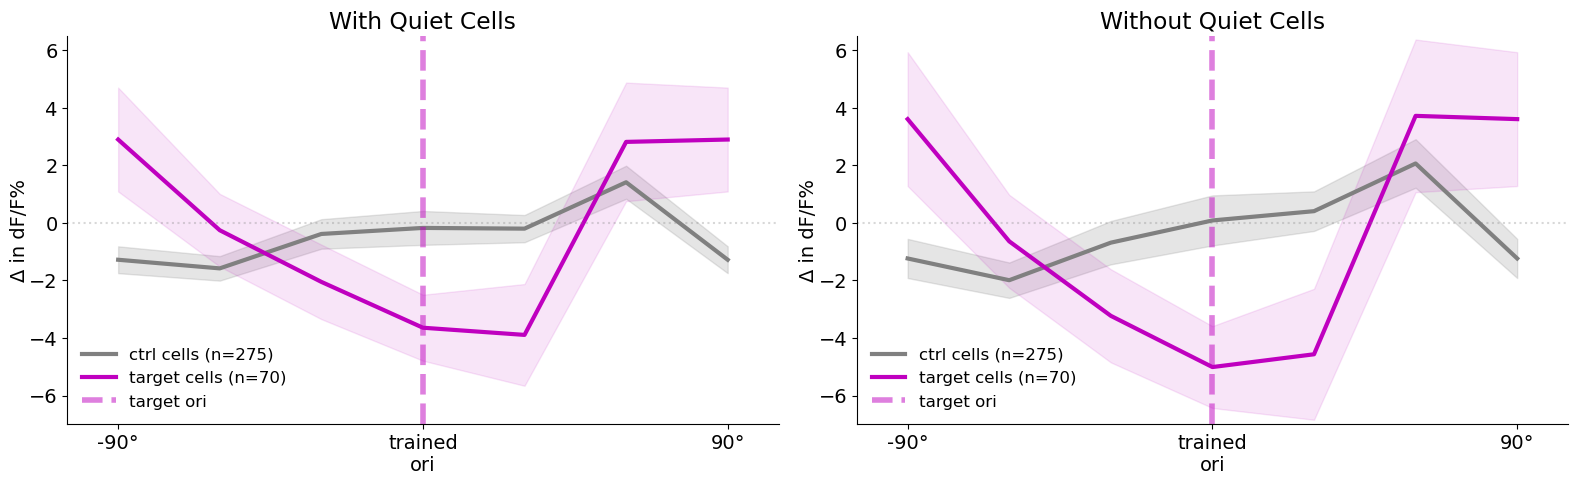

In [11]:
# Creates a plot of main result with and without trained cells that remained quiet, control quiet cells are still included

fig, axes = plt.subplots(1, 2, figsize=(16,5))
data_storage = [dfoF_V_change_ctrl,dfoF_V_change_bhStim]

for i, axis in enumerate(axes): 
    
    if i == 0:
        axis.set_title("With Quiet Cells")
        
        avg_bhStim = np.nanmean(dfoF_V_change_bhStim, axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(dfoF_V_change_bhStim, axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

        avg_ctrl = np.nanmean(dfoF_V_change_ctrl, axis=0)
        avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
        sem_ctrl = stats.sem(dfoF_V_change_ctrl, axis=(0),nan_policy='omit')
        sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))

    else:
        axis.set_title("Without Quiet Cells")
        avg_bhStim = np.nanmean(dfoF_V_change_bhStim[~trained_stay_quiet_cells], axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(dfoF_V_change_bhStim[~trained_stay_quiet_cells], axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

        avg_ctrl = np.nanmean(dfoF_V_change_ctrl[~ctrl_stay_quiet_cells], axis=0)
        avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
        sem_ctrl = stats.sem(dfoF_V_change_ctrl[~ctrl_stay_quiet_cells], axis=(0),nan_policy='omit')
        sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))

    difs = [avg_ctrl, avg_bhStim]

    colors = ['grey', 'm']
    font = {'size'   : 14}
    mpl.rc('font', **font)
    xs = [0,1,2,3,4,5,6]

    axis.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=%i)' %dfoF_V_change_ctrl.shape[0])
    axis.plot(difs[1],color=colors[1],lw=3,label='target cells (n=%i)' %dfoF_V_change_bhStim.shape[0])
    axis.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
    axis.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
    axis.set_xticks(
        ticks=[0, 3, 6],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    axis.set_ylabel('Δ in dF/F%',labelpad= 0)
    axis.set_ylim([-7,6.5])
    axis.set_xlim([-0.5,6.5])
            
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.axhline(c='grey',alpha=0.3,ls=':'); axis.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='target ori')
    axis.legend(loc='lower left',fontsize=12,frameon=False)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)

In [53]:
no_quiet = visResp_behavStim_pre[~trained_stay_quiet_cells,:]
check = any([any(no_quiet[row,:] < 0) for row in range(no_quiet.shape[0])])
print( "Does the pre visual response have negative values?: %s" % check) 

Does the pre visual response have negative values?: True


In [12]:
# Calculating the change in dF/F as a percentage of the pre-value 
relative_dfof = np.divide(dfoF_V_change_bhStim[~trained_stay_quiet_cells],abs(visResp_behavStim_pre[~trained_stay_quiet_cells,:]))*100 
relative_dfof_ctrl = np.divide(dfoF_V_change_ctrl[~ctrl_stay_quiet_cells],abs(ctrl_vis_pre[~ctrl_stay_quiet_cells]))*100 

# Statistical analysis 
mwu = stats.mannwhitneyu(relative_dfof,relative_dfof_ctrl, nan_policy='omit')
#w = stats.wilcoxon(relative_dfof,relative_dfof_ctrl)

# Make asterisks 
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

asterisks = [convert_pvalue_to_asterisks(x) for x in mwu.pvalue]
asterisks = np.concatenate((asterisks,asterisks[:1])) # for plotting 
mwu

MannwhitneyuResult(statistic=array([5093., 5235., 5111., 3733., 4148., 5135.]), pvalue=array([0.73219306, 0.50735568, 0.70181741, 0.00638137, 0.07343671,
       0.66205351]))

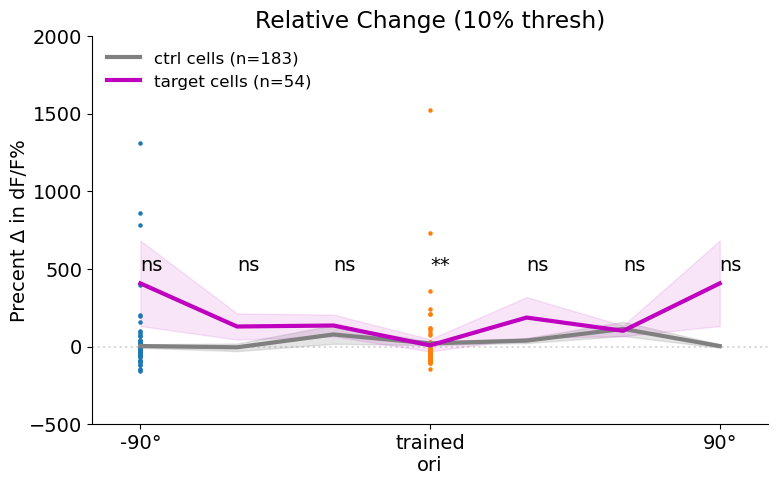

In [13]:
# Plotting Comparing Average Response of Cells with Relative (percent change) to Absolute Change
fig, axis = plt.subplots(1, 1, figsize=(8,5))

avg_ctrl = np.nanmean(relative_dfof_ctrl, axis=0)
avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
sem_ctrl = stats.sem(relative_dfof_ctrl, axis=(0),nan_policy='omit')
sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))

avg_bhStim = np.nanmean(relative_dfof, axis=0)
avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
sem_bhStim = stats.sem(relative_dfof, axis=(0),nan_policy='omit')
sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

axis.set_title("Relative Change (%i%% thresh)" % quiet_cell_threshold)

difs = [avg_ctrl, avg_bhStim]

colors = ['grey', 'm']
font = {'size'   : 14}
mpl.rc('font', **font)
xs = [0,1,2,3,4,5,6]

axis.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=%i)' %relative_dfof_ctrl.shape[0])
axis.plot(difs[1],color=colors[1],lw=3,label='target cells (n=%i)' %relative_dfof.shape[0])
axis.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
axis.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
axis.set_xticks(
    ticks=[0, 3, 6],
    labels=["-90\u00b0", "trained\nori", "90\u00b0"])
axis.set_ylabel('Precent Δ in dF/F%',labelpad= 0)
axis.set_xlim([-0.5,6.5])
axis.set_ylim([-500,2000])

# Plotting statistical significance
data = np.concatenate((avg_bhStim, avg_ctrl)).flatten() # flattening plotted data to find max 
y_position = data.max() * 1.2 # creating location for asterisks
for idx, pval in enumerate(asterisks):
    plt.text(x=idx, y=y_position, s=pval)

# Plot scatter of y-vlaues on -90 deg 
x_scatter = [0] * relative_dfof[:,0].shape[0]
x_scatter_ = [3] * relative_dfof[:,0].shape[0]

axis.scatter(x_scatter,relative_dfof[:,0],s=5)
axis.scatter(x_scatter_,relative_dfof[:,3], s=5)

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.axhline(c='grey',alpha=0.3,ls=':'); 
#axis.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='target ori')
axis.legend(loc='upper left',fontsize=12,frameon=False)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)

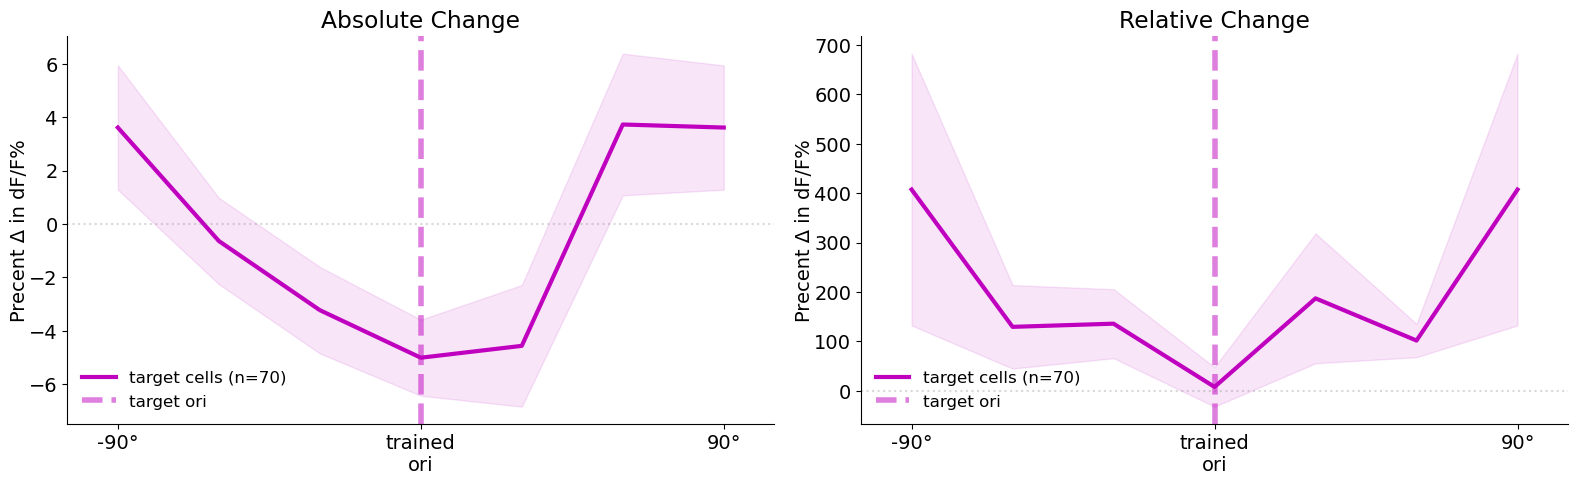

In [14]:
# Plotting Comparing Average Response of Cells with Relative (percent change) to Absolute Change

# Calculating the change in dF/F as a percentage of the pre-value 
relative_dfof = np.divide(dfoF_V_change_bhStim[~trained_stay_quiet_cells],abs(visResp_behavStim_pre[~trained_stay_quiet_cells,:]))*100 

fig, axes = plt.subplots(1, 2, figsize=(16,5))
data_storage = [dfoF_V_change_ctrl,dfoF_V_change_bhStim]

for i, axis in enumerate(axes): 

    if i == 0:
        avg_ctrl = np.nanmean(dfoF_V_change_ctrl, axis=0)
        avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
        sem_ctrl = stats.sem(dfoF_V_change_ctrl, axis=(0),nan_policy='omit')
        sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))
    
        avg_bhStim = np.nanmean(dfoF_V_change_bhStim[~trained_stay_quiet_cells], axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(dfoF_V_change_bhStim[~trained_stay_quiet_cells], axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))
        
        axis.set_title("Absolute Change")

    else:
        avg_bhStim = np.nanmean(relative_dfof, axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(relative_dfof, axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))
        
        axis.set_title("Relative Change")

    difs = [avg_ctrl, avg_bhStim]

    colors = ['grey', 'm']
    font = {'size'   : 14}
    mpl.rc('font', **font)
    xs = [0,1,2,3,4,5,6]

  #  axis.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=%i)' %dfoF_V_change_ctrl.shape[0])
    axis.plot(difs[1],color=colors[1],lw=3,label='target cells (n=%i)' %dfoF_V_change_bhStim.shape[0])
#    axis.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
    axis.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
    axis.set_xticks(
        ticks=[0, 3, 6],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    axis.set_ylabel('Precent Δ in dF/F%',labelpad= 0)
#    axis.set_ylim([-7,6.5])
    axis.set_xlim([-0.5,6.5])
            
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.axhline(c='grey',alpha=0.3,ls=':'); axis.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='target ori')
    axis.legend(loc='lower left',fontsize=12,frameon=False)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)

In [15]:
# Finding the orientation with the highest response for each cell (preferred tuning)
maxes = np.max(visResp_behavStim_pre,axis=1)
max_locs = np.argmax(visResp_behavStim_pre,axis=1)

# Pulling the cell index of the maximum value for each orientation (associates cells with their preferred ori)
preferred_ori_inds = [np.where(max_locs == ori_dir) for ori_dir in range(6)]

# Pulling the maximum values in the same way
max_cells = [maxes[preferred_ori_inds[ori_dir]] for ori_dir in range(6)]

# Create a dictionary for easy query
oris = [0, 30, 60, 90, 120, 150]
ori_dict = dict(zip(oris,preferred_ori_inds))
ori_dict

{0: (array([ 3,  9, 10, 24, 36, 40, 43, 48, 51, 63]),),
 30: (array([ 0, 11, 12, 14, 38]),),
 60: (array([ 1,  4,  7, 19, 21, 26, 29, 60]),),
 90: (array([15, 18, 22, 23, 37, 42, 57, 59, 69]),),
 120: (array([ 5, 13, 25, 27, 30, 31, 32, 33, 34, 35, 39, 41, 45, 46, 47, 50, 53,
         61, 64, 65, 66, 67]),),
 150: (array([ 2,  6,  8, 16, 17, 20, 28, 44, 49, 52, 54, 55, 56, 58, 62, 68]),)}

In [16]:
# Hand calculated index change arrays for each ori, this is the change in index locations for orientation
# a janky way to do this plot but...
index_shift_array = [[3,4,5,0,1,2],[2,3,4,5,0,1],[1,2,3,4,5,0],[0,1,2,3,4,5],[5,0,1,2,3,4],[4,5,0,1,2,3]]
#index_shift_array = [[3,3,3,-3,-3,-3],[2,2,2,2,-4,-4],[1,1,1,1,1,-5],[0,0,0,0,0,0],[5,-1,-1,-1,-1,-1],[4,4,-2,-2,-2,-2]]

shift_dict = dict(zip(oris,index_shift_array))

In [17]:
# Aligns data based on preferred orientation preference 
start_inds = [0, 1, 2, 3, 4, 5]
datas = [dfoF_V_change_bhStim,dfoF_V_change_ctrl]
stim_ori_aligned = np.zeros(dfoF_V_change_bhStim.shape)
ctrl_ori_aligned = np.zeros(dfoF_V_change_ctrl.shape)

for dataset in datas: 
    row_num = 0 

    # Loop over each orientation
    for ori, ori_org_cell_inds in ori_dict.items():

        # Create a list of indices to shift values such that the preferred orientation is in the 3 index
        # Uses above hand-coded arrays, the purpose of this is to plot relative to a cells preferred tuning
        reorder = shift_dict[ori]

        # Pulls data from each cell of a given orientation
        # Need [0] to pull array out of tuple
        for cell_ind in ori_org_cell_inds[0]:
            data = dataset[cell_ind,:]

            # Reorder data from each cell such that the preferred orientation is in index 3
            holder = [0] * len(data) 
            for ind in range(len(data)):
                holder[reorder[ind]] = data[ind]

            # Store data in new matrix
            if dataset.shape == dfoF_V_change_bhStim.shape:
                stim_ori_aligned[row_num,:] = holder
            else:
                ctrl_ori_aligned[row_num,:] = holder

            row_num = row_num + 1
            

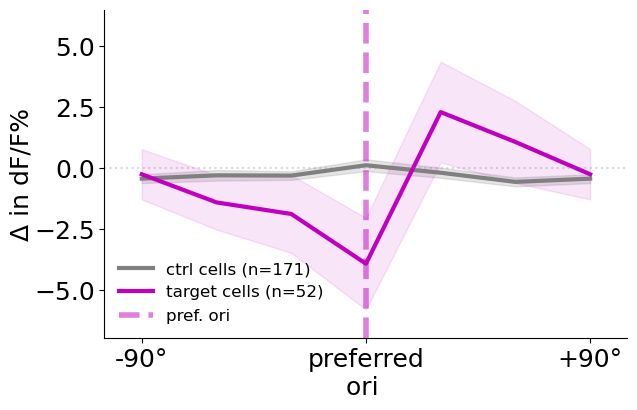

In [18]:
avg_ctrl = np.nanmean(ctrl_ori_aligned, axis=0)
avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
avg_bhStim = np.nanmean(stim_ori_aligned, axis=0)
avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))

sem_ctrl = stats.sem(ctrl_ori_aligned, axis=(0),nan_policy='omit')
sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))
sem_bhStim = stats.sem(stim_ori_aligned, axis=(0),nan_policy='omit')
sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

difs = [avg_ctrl, avg_bhStim]

fig= plt.figure(figsize=(12,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['grey', 'm']
font = {'size'   : 18}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')
xs = [0,1,2,3,4,5,6]

ax1 = fig.add_subplot(221)
ax1.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=171)')
ax1.plot(difs[1],color=colors[1],lw=3,label='target cells (n=52)')
ax1.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
ax1.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
#ax1.set_xlabel('orientation')
ax1.set_xticks([0,3,6]); ax1.set_xticklabels(['-90°','preferred\nori ','+90°'])
ax1.set_ylabel('Δ in dF/F%',labelpad= 0)
ax1.set_ylim([-7,6.5])
ax1.set_xlim([-0.5,6.5])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axhline(c='grey',alpha=0.3,ls=':'); ax1.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='pref. ori')
ax1.legend(loc='lower left',fontsize=12,frameon=False)
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)

/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_97153/2466663042.py:27: RuntimeWarning: divide by zero encountered in divide
  baseline_trial_activity_dfof = np.divide(baseline_trial_activity,baseline)
/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_97153/2466663042.py:27: RuntimeWarning: invalid value encountered in divide
  baseline_trial_activity_dfof = np.divide(baseline_trial_activity,baseline)


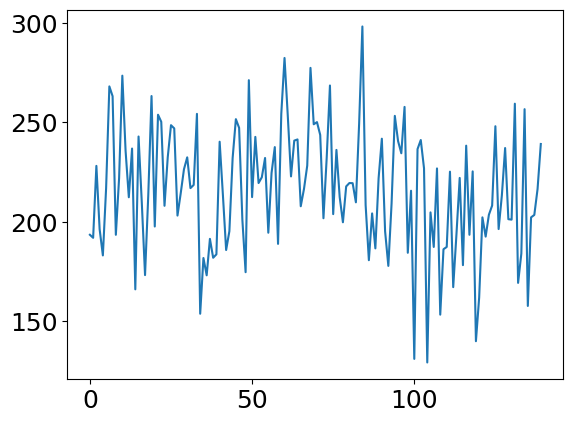

In [19]:
# Pulling variable for trial data 
# (349, 16, 30, 140) = cell x stim (opto and vis) x rep x frame 

# Missing i5398 because less opto patterns used so can't concatenate easily 
trial_ftrace_pre_lseg = np.concatenate((pre_arrs_i5273['trial_ftrace_pre_lseg'],pre_arrs_i5214['trial_ftrace_pre_lseg'],pre_arrs_i5309['trial_ftrace_pre_lseg']))
trial_ftrace_post_lseg = np.concatenate((post_arrs_i5273['trial_ftrace_post_lseg'],post_arrs_i5214['trial_ftrace_post_lseg'],post_arrs_i5309['trial_ftrace_post_lseg']))

pre_arrs_i5398['trial_ftrace_pre_lseg'][:,6:11,:,:]
post_arrs_i5398['trial_ftrace_post_lseg'][:,6:11,:,:]

# Taking only vis traces & concat i5398 
vis_trace_pre = np.concatenate((trial_ftrace_pre_lseg[:,11:16,:,:],pre_arrs_i5398['trial_ftrace_pre_lseg'][:,6:11,:,:]),axis=0)
vis_trace_post = np.concatenate((trial_ftrace_post_lseg[:,11:16,:,:],post_arrs_i5398['trial_ftrace_post_lseg'][:,6:11,:,:]),axis=0)

datas = [vis_trace_pre,vis_trace_post]


plt.plot(post_arrs_i5273['trial_ftrace_post_lseg'][0,1,0,:])

exp_params = pickle.load(open(os.path.join('/Users/phillipscm/data-local/i5398/suite2p/', 'expt_params.pkl'),'rb')); #print('\npre_params)
bline = exp_params['baseline_frame_range']
# Take each cell, section the stims we need, normalize each rep, average 
for data in datas:
    # Normalize baseline data with first half 
    baseline = np.mean(data[:,:,:,bline[0]:int(bline[1]/2)],axis=3) # Averaging across baseline normalization
    baseline_trial_activity = np.mean(data[:,:,:,int(bline[1]/2):bline[1]],axis=3) # Averaging across baseline activity used for measure
    baseline_trial_activity_dfof = np.divide(baseline_trial_activity,baseline)
    baseline_activity = np.mean(baseline_trial_activity_dfof,axis=2) # Average across trials 
    
# HOW TO GET CELL IDENTITIES?



In [20]:
# Aligns data based on preferred orientation preference 
start_inds = [0, 1, 2, 3, 4, 5]
datas = [dfoF_V_change_bhStim,dfoF_V_change_ctrl]
stim_ori_aligned = np.zeros(dfoF_V_change_bhStim.shape)
ctrl_ori_aligned = np.zeros(dfoF_V_change_ctrl.shape)

for dataset in datas: 
    row_num = 0 

    # Loop over each orientation
    for ori, ori_org_cell_inds in ori_dict.items():

        # Create a list of indices to shift values such that the preferred orientation is in the 3 index
        # Uses above hand-coded arrays, the purpose of this is to plot relative to a cells preferred tuning
        reorder = shift_dict[ori]

        # Pulls data from each cell of a given orientation
        # Need [0] to pull array out of tuple
        for cell_ind in ori_org_cell_inds[0]:
            data = dataset[cell_ind,:]

            # Reorder data from each cell such that the preferred orientation is in index 3
            holder = [0] * len(data) 
            for ind in range(len(data)):
                holder[reorder[ind]] = data[ind]

            # Store data in new matrix
            if dataset.shape == dfoF_V_change_bhStim.shape:
                stim_ori_aligned[row_num,:] = holder
            else:
                ctrl_ori_aligned[row_num,:] = holder

            row_num = row_num + 1
            

In [21]:
# Sub-selecting preferred orientations from the data
reward_adj_oris = [60, 90, 120]
reward_adj_cells = [ori_dict.get(ori) for ori in reward_adj_oris]
flat_rew_adj_cells = np.concatenate(reward_adj_cells,axis=1)[0] # formatting into one list of indexes 
cells_from_specfic_oris = dfoF_V_change_bhStim[flat_rew_adj_cells,:] # data for queried cells 

In [22]:
# Calculating the number of quiet cells in our data
pre_quiet_cells = [all(np.abs(dfoF_V_avg_array_pre_active[row,:]) < 10) for row in range(dfoF_V_avg_array_pre_active.shape[0])]
post_quiet_cells = [all(np.abs(dfoF_V_avg_array_post_active[row,:]) < 10) for row in range(dfoF_V_avg_array_post_active.shape[0])]
stay_quiet_cells = np.logical_and(pre_quiet_cells,post_quiet_cells)
print("Number of starting quiet cells: %i" % len([i for i, x in enumerate(pre_quiet_cells) if x]))
print("Number of ending quiet cells: %i" % len([i for i, x in enumerate(post_quiet_cells) if x]))
print("Cells that remained quiet: %i" % len([i for i, x in enumerate(stay_quiet_cells) if x]))

NameError: name 'dfoF_V_avg_array_pre_active' is not defined

In [ ]:
## LEFT OFF HERE the code above can be formatted to subselected cells with specific orientation tuning
# in this cell I was planning to subcategorize the cells based on OSI to get narrow and broadly-tuned cells

osi_threshold = 0.5 
test_osi = np.linspace(0,1,len(dfoF_V_change_bhStim)) # Dummy data 

In [ ]:
# NOT COMPLETE: can use this code to compare main effect with cells of different tuning width

fig, axes = plt.subplots(1, 2, figsize=(16,5))
data_storage = [dfoF_V_change_ctrl,dfoF_V_change_bhStim]

for i, axis in enumerate(axes): 
    
    avg_ctrl = np.nanmean(dfoF_V_change_ctrl, axis=0)
    avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
    sem_ctrl = stats.sem(dfoF_V_change_ctrl, axis=(0),nan_policy='omit')
    sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))
        
    if i == 0:
        
        avg_bhStim = np.nanmean(dfoF_V_change_bhStim, axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(dfoF_V_change_bhStim, axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

    else:

        avg_bhStim = np.nanmean(cells_from_specfic_oris, axis=0)
        avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))
        sem_bhStim = stats.sem(cells_from_specfic_oris, axis=(0),nan_policy='omit')
        sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))
        
        
    difs = [avg_ctrl, avg_bhStim]

    #fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
    colors = ['grey', 'm']
    font = {'size'   : 14}
    mpl.rc('font', **font)
    #fig.text(0.52, 0.44, 'orientation', ha='center', va='center')
    xs = [0,1,2,3,4,5,6]

    axis.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=%i)' %dfoF_V_change_ctrl.shape[0])
    axis.plot(difs[1],color=colors[1],lw=3,label='target cells (n=%i)' %dfoF_V_change_bhStim.shape[0])
    axis.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
    axis.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
    axis.set_xticks(
        ticks=[0, 3, 6],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    axis.set_ylabel('Δ in dF/F%',labelpad= 0)
    axis.set_ylim([-7,6.5])
    axis.set_xlim([-0.5,6.5])
    
    if i == 0: 
        axis.set_title("With Quiet Cells")
    else:
        axis.set_title("Without Quiet Cells")

            
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.axhline(c='grey',alpha=0.3,ls=':'); axis.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='target ori')
    axis.legend(loc='lower left',fontsize=12,frameon=False)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)